<a href="https://colab.research.google.com/github/polinal80/skills-introduction-to-github/blob/main/Lokesh_Personal_Loan_Campaign_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 44.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.3 requires scikit-lear

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

**Convert ipynb to HTML**

In [ ]:

#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving Lokesh_Personal_Loan_Campaign_ML_Project_full_code_notebook.ipynb to Lokesh_Personal_Loan_Campaign_ML_Project_full_code_notebook.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library to split data
from sklearn.model_selection import train_test_split
# to build a linear regression model
from sklearn.linear_model import LinearRegression
# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,

)
# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')
 ##  Complete the code to read the data
Loan = pd.read_csv('/content/drive/MyDrive/ML/Loan_Modelling.csv')
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

Mounted at /content/drive


## Data Overview

* Observations
* Sanity checks

View the first and last 5 rows of the dataset.

In [ ]:
##  Complete the code to view top 5 rows of the data
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
##  Complete the code to view last 5 rows of the data
data.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

Understand the shape of the dataset.

In [ ]:
## Complete the code to get the shape of the data
data.shape

(5000, 14)

Check the data types of the columns for the dataset

In [ ]:
##  Complete the code to view the datatypes of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**   All variable types are int except CCAvg is float

Checking the Statistical Summary

In [ ]:
## Complete the code to print the statistical summary of the data
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observation:**


*   The min Age is 23 , max is 67 , Average is 45 Years old - Data seems reasonable and normaly distributed.
*  The min Experience is -3 years which does not seem reasonable, hence requires a closer look.
*  The min Income is USD 8k,Standard income is USD 46K, max is USD 224K and average is USD 73.77K - Dataset seems to be right skewed.
*   The Zip codes shall not be treated as an integer value as it reflects location - Requires data pre-processing.
*   The min Family size is 1, max is 4 and average is 2 - Dataset seems reasonable and almost uniformly distributed and can be treated as a categorical variable as it holds only 4 values.
*   The min CCAvg is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 10K and average is USD 1.93K - Dataset seems reasonable and right skewed.
*   The Education is a categorical variable where 1: Undergrad; 2: Graduate;3: Advanced/Professional.
*   The min Mortgage is USD 0k, max is USD 635K and average is USD 0K - Dataset heavily right skewed.
*   The Personal_Loan is a categorical variable where 1: customer accepted the personal loan offered in the last campaign and 0:customer didnot accept.
*   The Securities_Account is a categorical variable where 1: customer has Securities_Account 0:customer does not have Securities_Account.
*   The CD_Account is a categorical variable where 1: customer has CD_Account 0:customer does not have CD_Account.
*  The Online is a categorical variable where 1: customer uses online banking 0:customer does use online banking.
*  The CreditCard is a categorical variable where 1: customer use a credit card issued by any other Bank 0:customer does not use a credit card issued by any other Bank.
















In [ ]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observation:**   No Null values in the dataset

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

   Observation:       No duplicated values in the dataset

**Dropping columns**

In [ ]:
 ## Complete the code to drop a column from the dataframe
data = data.drop('ID', axis=1)

In [ ]:
data[data['Experience']<0]['Experience'].count()

52

**Observation:**   There are 52 rows with a negative value

**Data Preprocessing**

Checking for Anomalous Values

In [ ]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
data['Experience'] = data['Experience'].abs()
data.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.134600    11.415189      0.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

In [ ]:
data[data['Experience']<0]['Experience'].count()

0

**Observation:**  No more negative values in the variable Experience

In [ ]:
data["Education"].unique()

array([1, 2, 3])

**Feature Engineering**

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
         order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
             size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations on all Variables:**

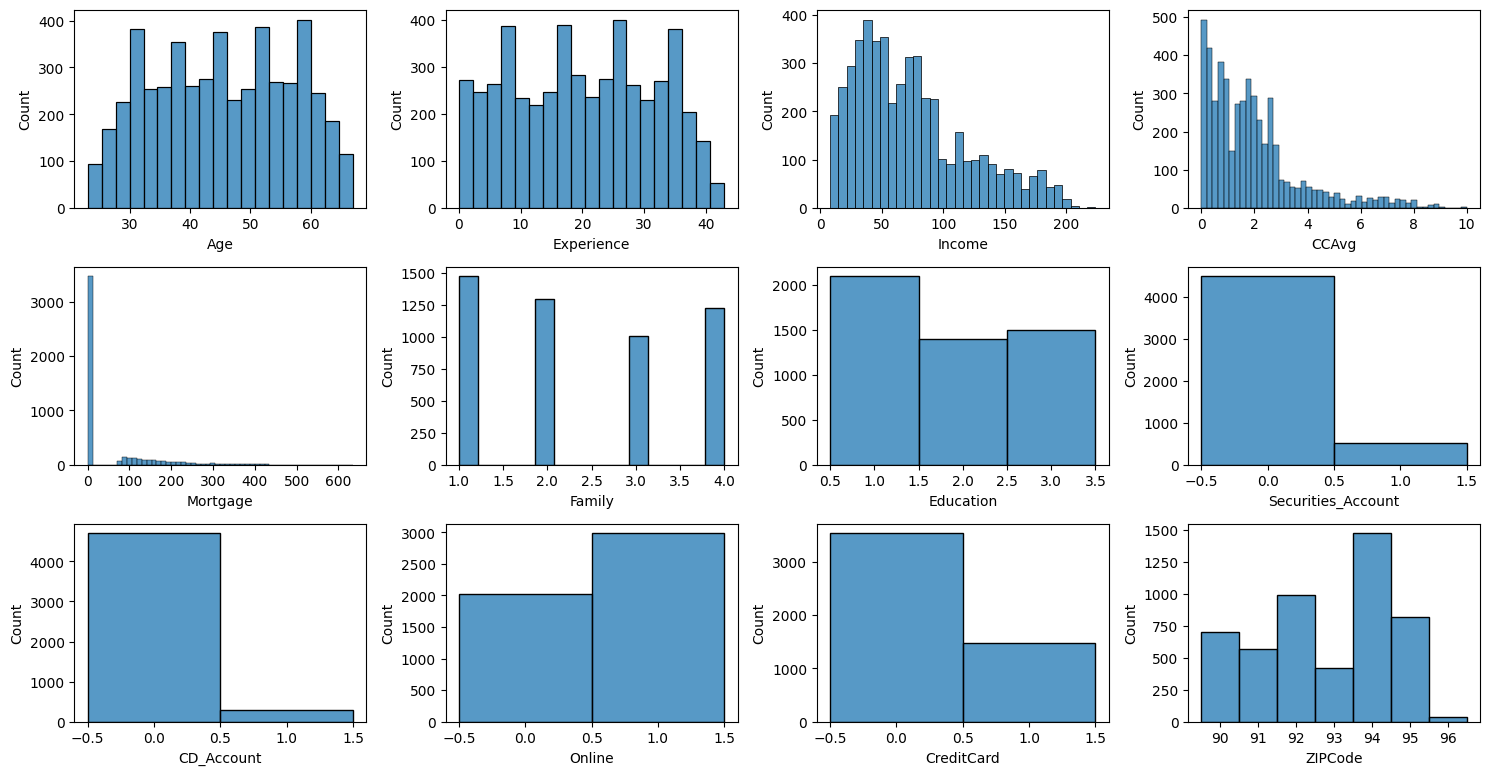

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age','Experience','Income','CCAvg','Mortgage','Family','Education','Securities_Account','CD_Account','Online','CreditCard','ZIPCode']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(4, 4, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

**Observation On Age:**

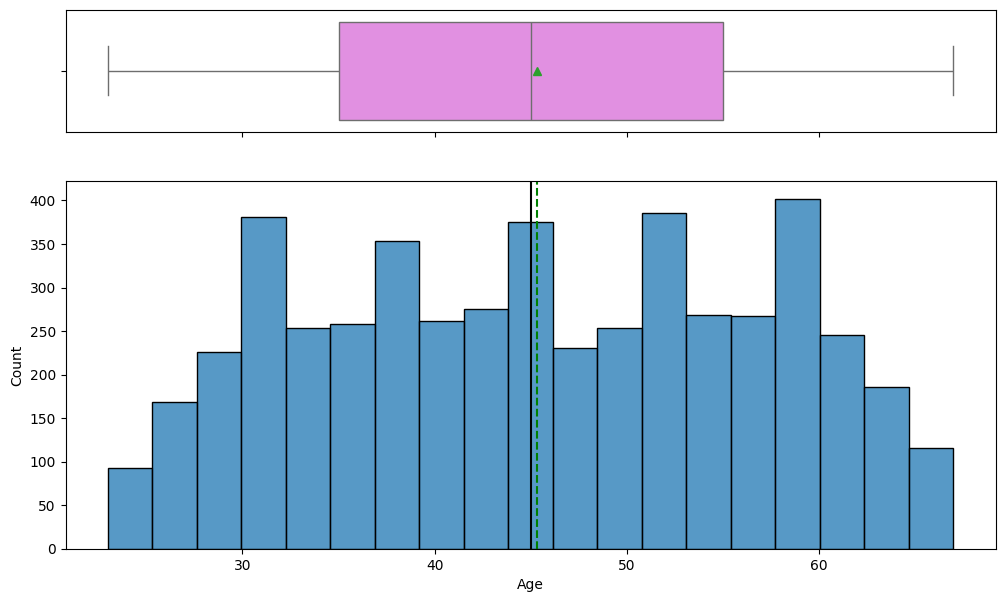

In [ ]:
histogram_boxplot(data,'Age') ## Complete the code to create histogram_boxplot for Age

**Observation On Age:   **

*   The min is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution.
*  The maximum number of clients is within the 58-60 years old range, there are also peak counts at 30-32, 38-40, 44-46 and 52-54 years old
*   here are no outliers observed.





**Observations on Experience**

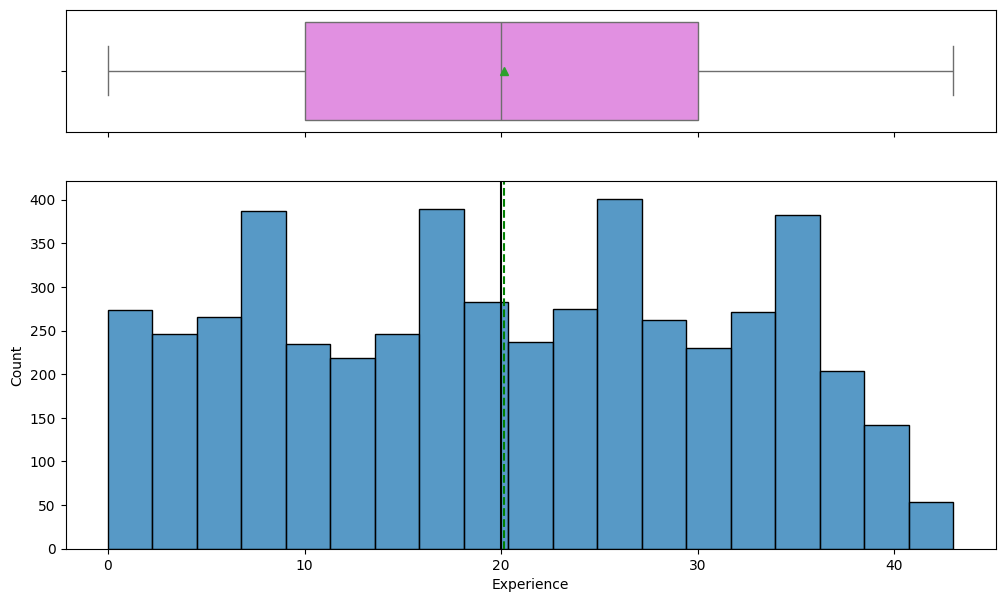

In [ ]:
histogram_boxplot(data,'Experience') ## Complete the code to create histogram_boxplot for experience

**Observation:**

*   The min Experience is 0 years, the max is 43 and the mean is approximatly 20 years.
*   The data is almost fitting a uniform distribution with peaks at 12-14 years and 28-30 years.
*   There are no outliers observed






**Observations on Income**

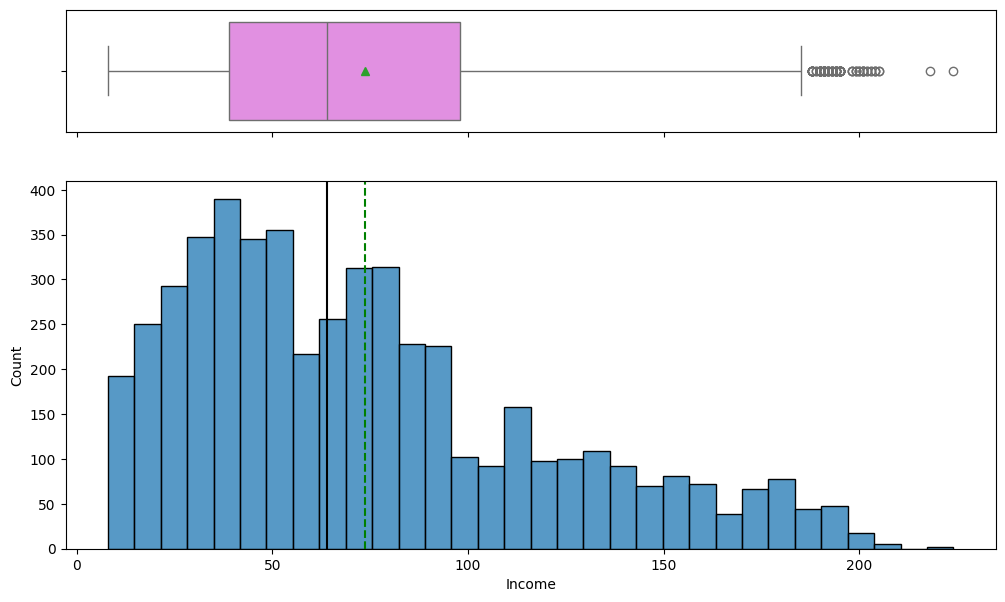

In [ ]:
histogram_boxplot(data,'Income')  ## Complete the code to create histogram_boxplot for Income

**Observation:**  

*  The min Income is USD 8k,Standard income is USD 46K, max is USD 224K and average is USD 73.77K - Dataset seems to be right skewed.
*   There is a number of outliers, yet they seem consistent with the data hence no action is required for outlier treatment.



**Observations on CCAvg**

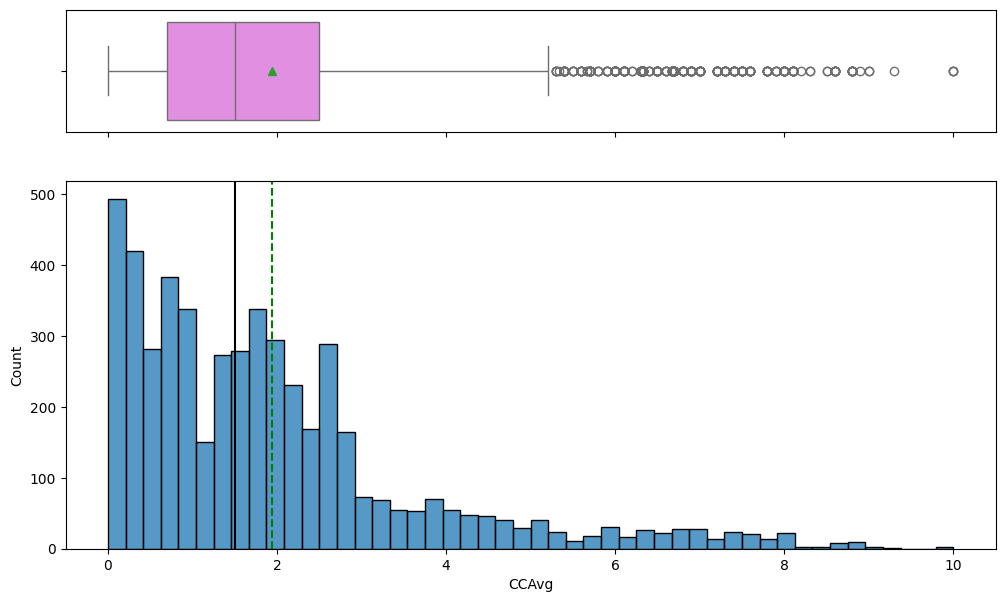

In [ ]:
histogram_boxplot(data,'CCAvg')  ## Complete the code to create histogram_boxplot for CCAvg

**Observation:**


*  The min CCAvg is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 10K and average is approx USD 1.9K.
*  Dataset is right skewed with a number of outliers that seem homogenous with the data, hence no action required for the outliers.



In [ ]:
#Number of people with zero credit card spending per month?
data[data['CCAvg']==0]['CCAvg'].count()

106

Observations on Mortgage

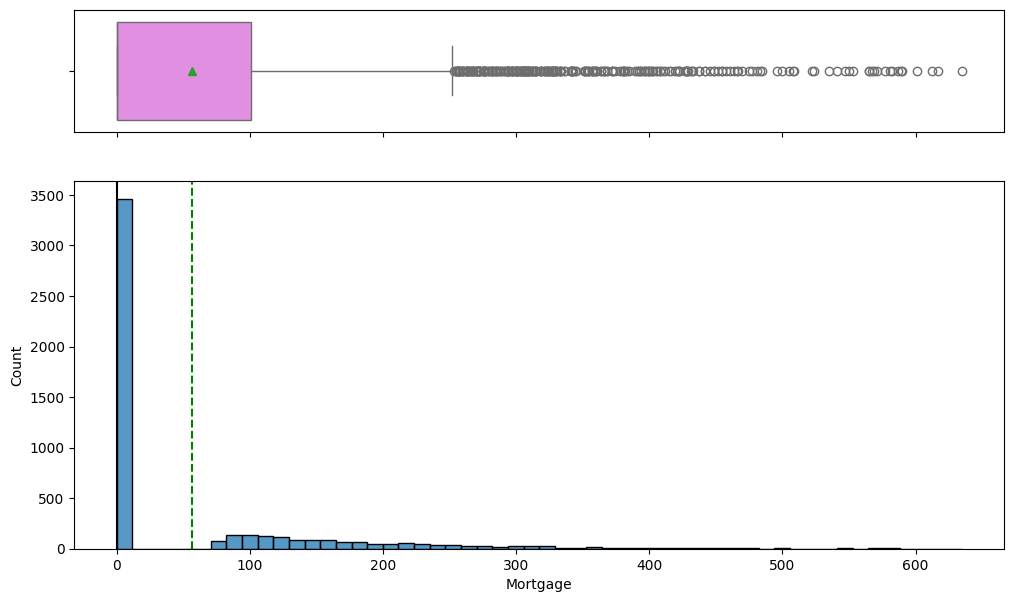

In [ ]:
histogram_boxplot(data,'Mortgage')  ## Complete the code to create histogram_boxplot for Mortgage

**Observations:**

*   The min Mortgage is USD 0k, max is USD 635K and average is USD 0K - Dataset heavily right skewed
*   To visualize better, we will separate the USD 0k mortgage from the > USD 0K mortgage and plot the data again


In [ ]:
#Number of people with zero mortgage?

data[data['Mortgage']==0]['Mortgage'].count()

3462

In [ ]:
#extracting the customers with mortgage values > 0
mortgage = data[data['Mortgage']>0]
print(f'There are {len(mortgage)} customers under mortgage and forms {round((len(mortgage)/5000)*100)}% of the dataset')

There are 1538 customers under mortgage and forms 31% of the dataset


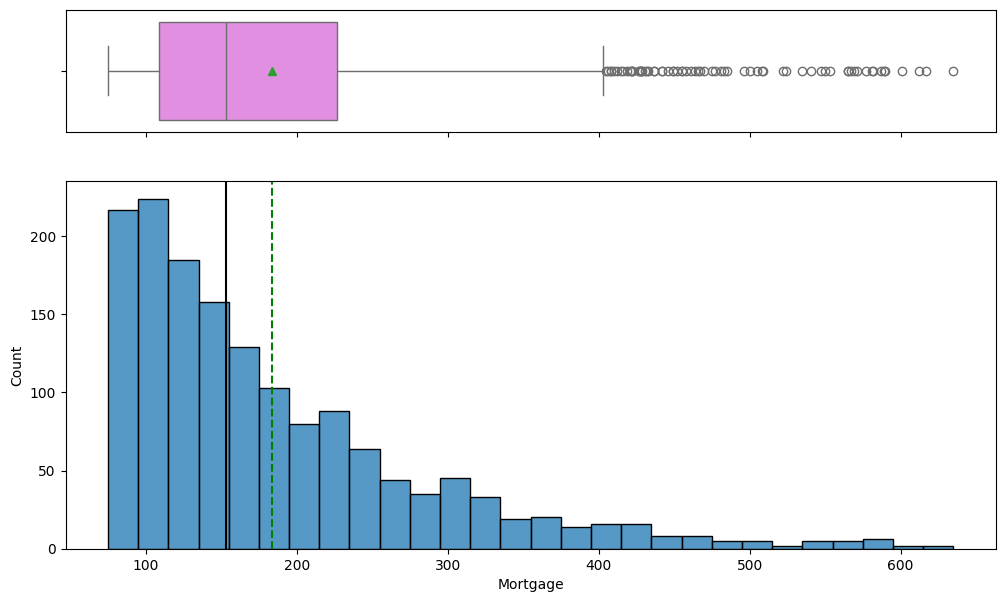

In [ ]:
#plotting the mortgage of the customers
histogram_boxplot(mortgage,'Mortgage')

**Observation on Mortgage >0 :**

The mortgage distibution of the customers under mortgage is right skewed with a minimum value of approx 99K to max value of 635K and mean value between USD 180-200K .

**Observations on Family**

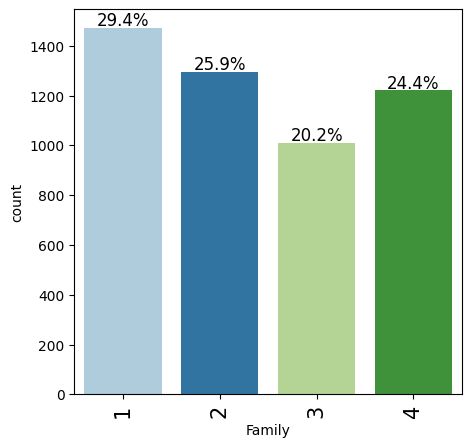

In [ ]:
labeled_barplot(data, "Family", perc=True)

**Observation:**
The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.

**Observations on Education**

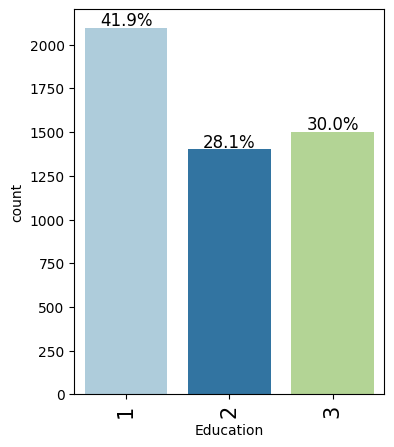

In [ ]:
 ## Complete the code to create labeled_barplot for Education
labeled_barplot(data,'Education',perc=True)

**Observation of education:**

*   41.9% of customers are 1: Undergrad
*  28.1% of customers are 2: Graduate
*   30.0% of customers are 3: Advanced/Professional





Observations on Securities_Account

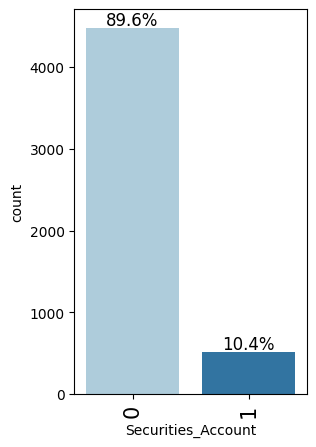

In [ ]:
## Complete the code to create labeled_barplot for Securities_Account
labeled_barplot(data,'Securities_Account',perc=True)

**Observation :**


*   89.6% of customers Do Not have a Securiyties_Account
*   10.4% only have a Securiyties_Account



Observations on CD_Account

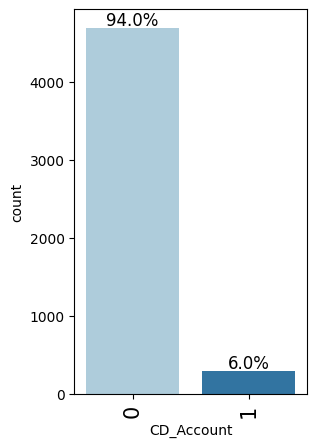

In [ ]:
## Complete the code to create labeled_barplot for CD_Account
labeled_barplot(data,'CD_Account',perc=True)

**Observation:**
*   94% of customers Do Not have a CD_Account
*   6% only have a CD_Account



**Observation On Personal Loan**

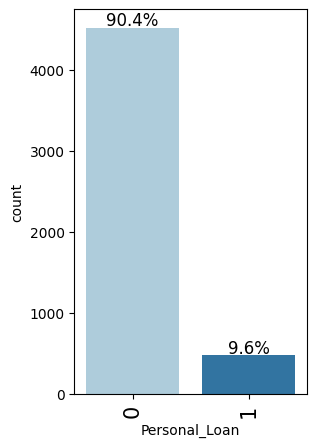

In [ ]:
## Complete the code to create labeled_barplot for Personal Loan
labeled_barplot(data,'Personal_Loan',perc=True)

**Observation:**

*   90.4% of customers Did not accept a loan

*   9.6% of customers accepted a loan



Observations on Online

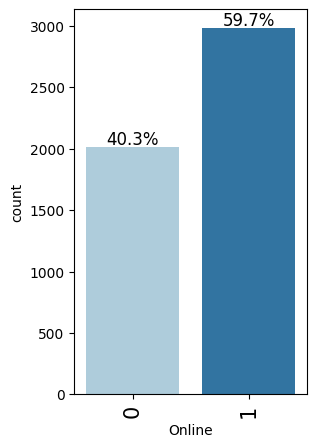

In [ ]:
## Complete the code to create labeled_barplot for Online
labeled_barplot(data,'Online',perc=True)

Observation on CreditCard

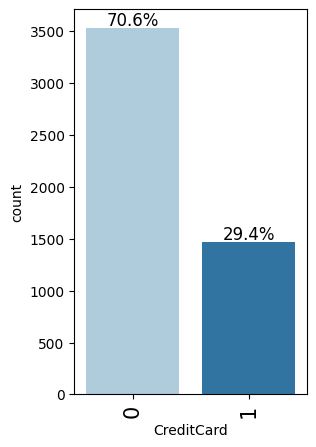

In [ ]:
## Complete the code to create labeled_barplot for CreditCard
labeled_barplot(data,'CreditCard', perc=True)

**Observation:**


*   70.6% of customers do not use any credit card issued by a other banks

*   29.4% of customers use a credit card issued by a other banks
*   1470 Customers are having credits cards
*   3530 Cusomers do not use any credit card





How many customers have credit cards?

In [ ]:
data[data['CreditCard']==1].count()

Age                   1470
Experience            1470
Income                1470
ZIPCode               1470
Family                1470
CCAvg                 1470
Education             1470
Mortgage              1470
Personal_Loan         1470
Securities_Account    1470
CD_Account            1470
Online                1470
CreditCard            1470
dtype: int64

Observation on ZIPCode

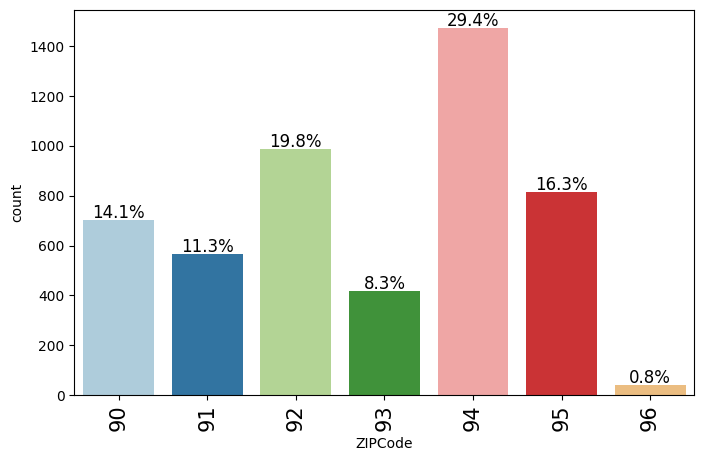

In [ ]:
## Complete the code to create labeled_barplot for ZIPCode
labeled_barplot(data,'ZIPCode',perc=True)

**Observation:**


*   Majority of the custmers are from location contains zip code: 94***,29.4% of cutmers from zip code 94***
*  19.8% customers are from location contains zip code 92***
*   Least Customers are from Location contains zipcode 96***






Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<Figure size 1500x1500 with 0 Axes>

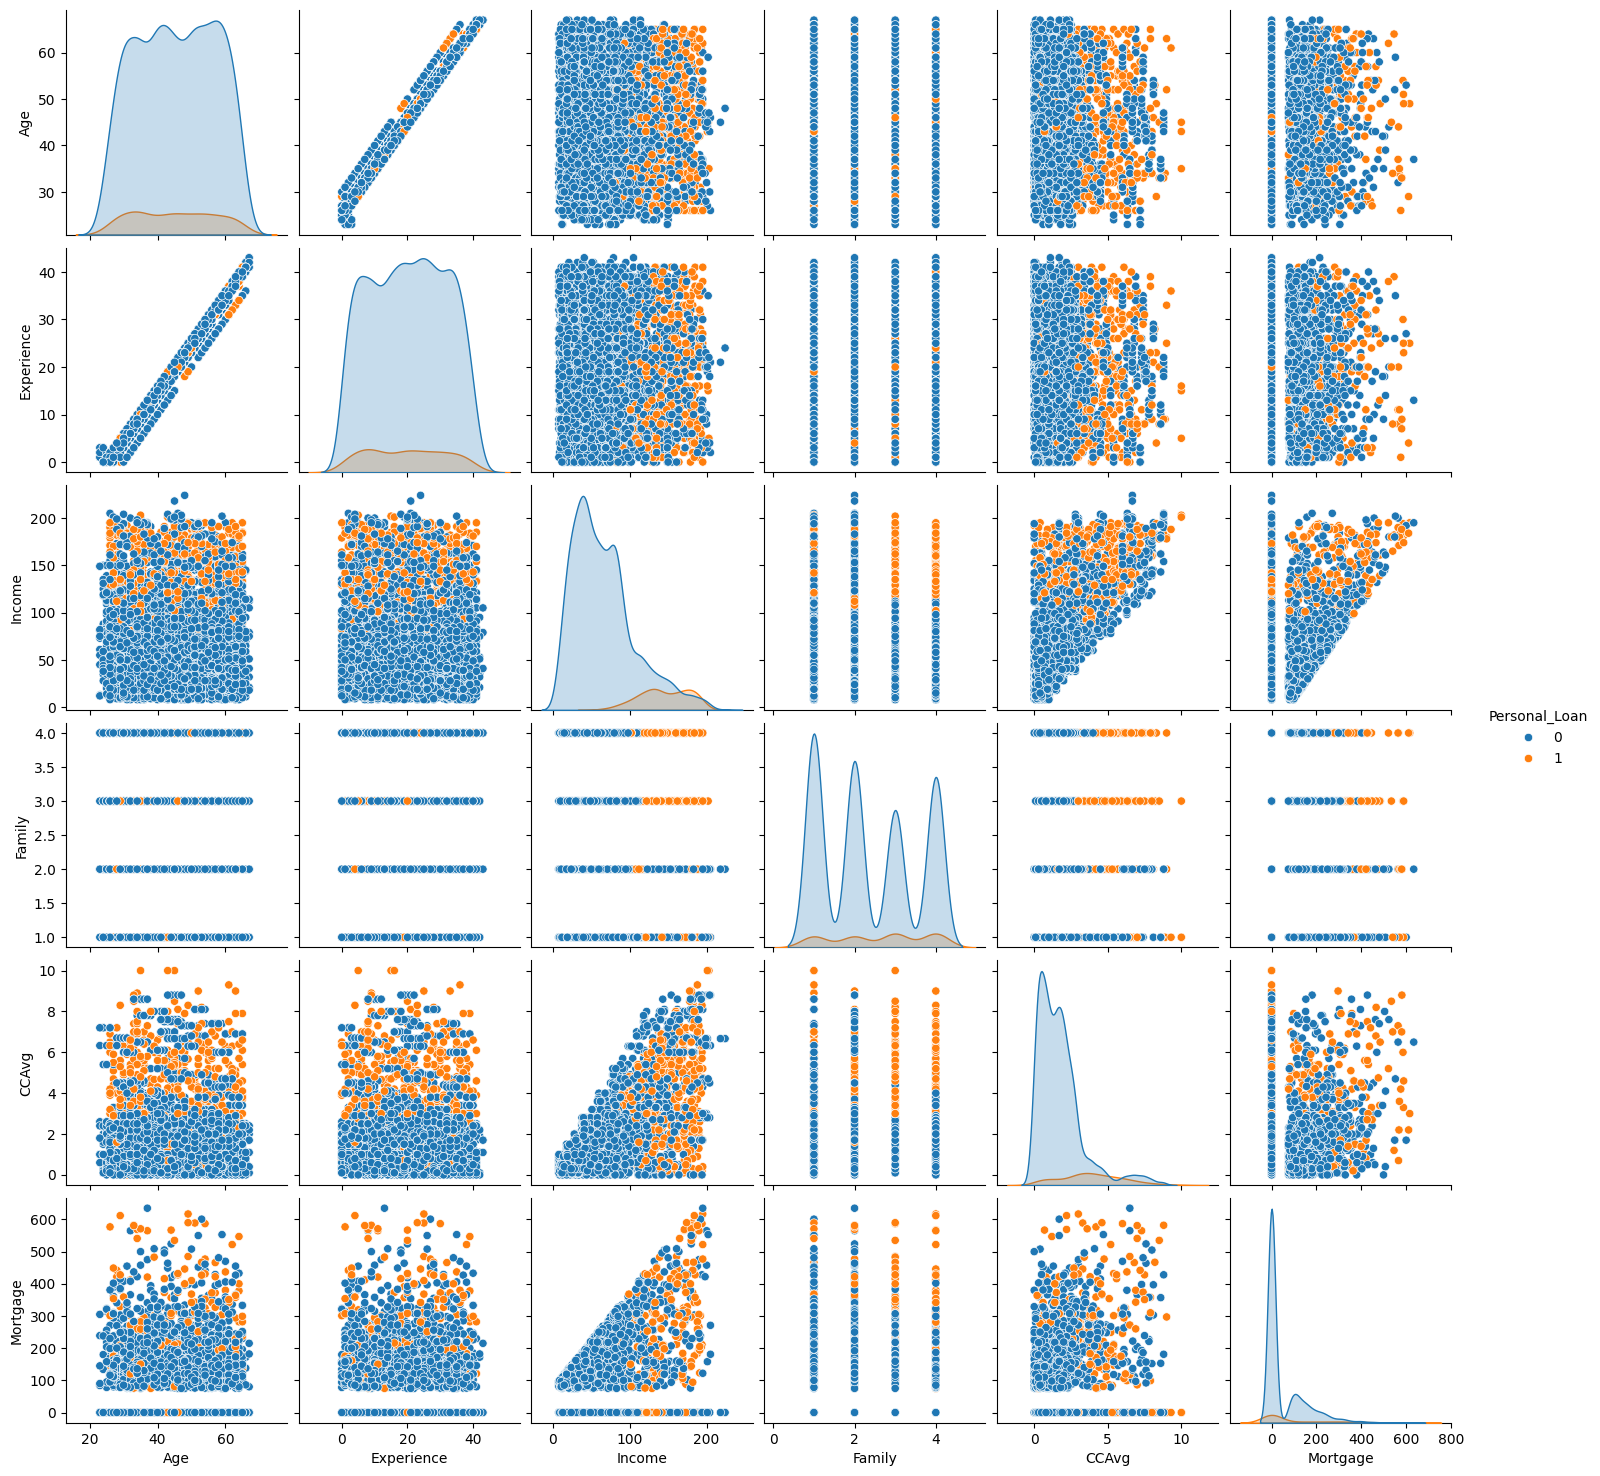

In [ ]:
plt.figure(figsize=(15,15))
# sns.pairplot(loan, diag_kind='kde')
sns.pairplot(data, hue="Personal_Loan")
plt.show()

**Observation:**

*   The orange spots present the customers who accepted a personal_loan and the blue spots show the ones who did not.
*   From the univariate analysis of the personal_loan dataset it was observed that only 9.6% of the customers accepted the personal loan, hence this observation is consistent with the pair plot where the majority of the spots are blue.
*   It is observed that there is a very strong linear corelation between Age and Experience
*   It is observed that there is a slight correlation between Income and CCAvg
*   High concentraion of customers who accepted a personal loan are observed at:

     *   Higher Income level (starting at approx USD 100K and above)
     *  Higher CCAvg (starting at approx USD 3K and above)
     *   Higher Mortgage value (starting at approx USD 300K and above)
         Customers with CD_Accounts
     *   Customers who use credict cards issued from other banks
     *  Famillies with sizes 3 or 4
     *   Customers with Eductaion 2(graduate) or 3 (advanced/professional)
















**Correlation check**

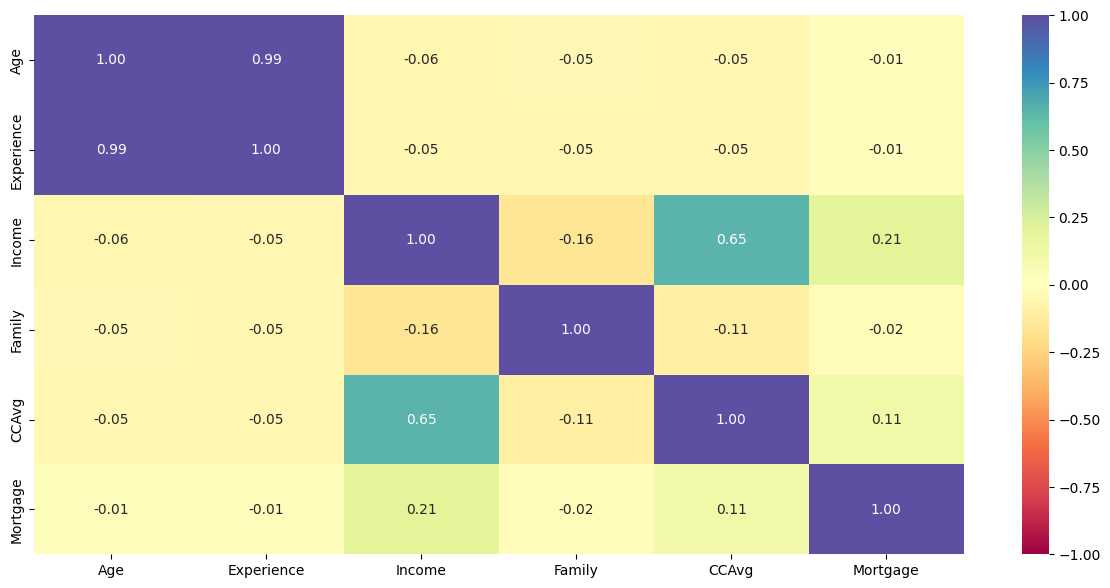

In [ ]:
# Complete the code to get the heatmap of the data
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

The correlation heatmap supports the correlation observed in the pairplot where:

*   The correlation between Age and Experience is very high (value = 0.99).
*   The correlation between Income and CCAvg is low (value = 0.65).
*  All other correlation values are quiet small for consideration.






**What are the attributes that have a strong correlation with the target attribute (personal loan)?**

In [ ]:
data.corrwith(data['Personal_Loan']).sort_values(ascending=False)

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.000607
Age                  -0.007726
Experience           -0.008304
dtype: float64

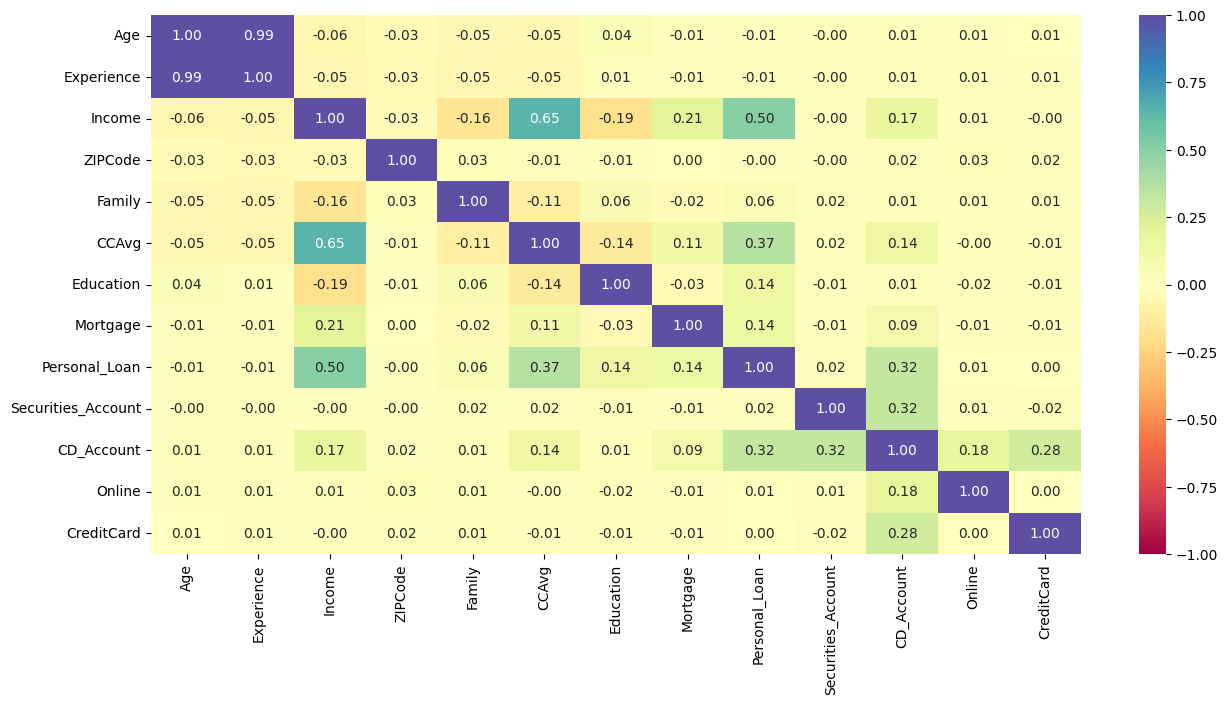

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

*   The  attributes/Variables are Income,CCAvg,CD_Account are having strong correlation with the target attribute personal loan.
*   Variabls/ Attributes Experiance, Age,Credit card and Online have neglagible correlation with the target attribute personal loan



**How does a customer's interest in purchasing a loan vary with their education?**

Let's check how a customer's interest in purchasing a loan varies with their education

**Personal_Loan vs Education**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


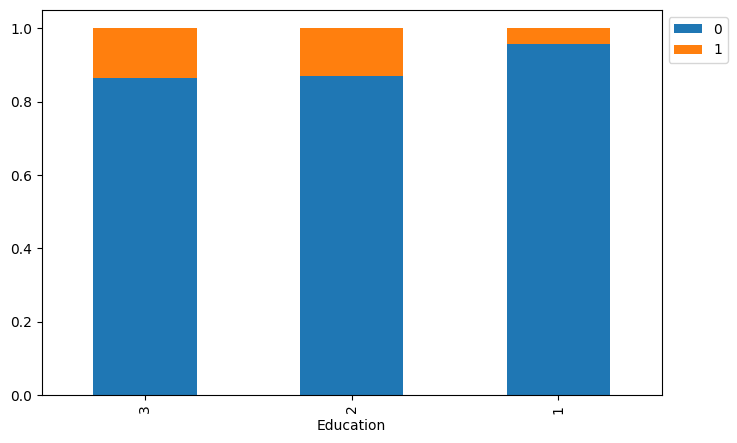

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Education
stacked_barplot(data,"Education","Personal_Loan")

**Observation:**
It is observed that customers with education level 3 and 2 are more willing to accept a personal loan than the education level 1. The top proportion is observed at customers with education level 3

**Personal_Loan vs Family**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


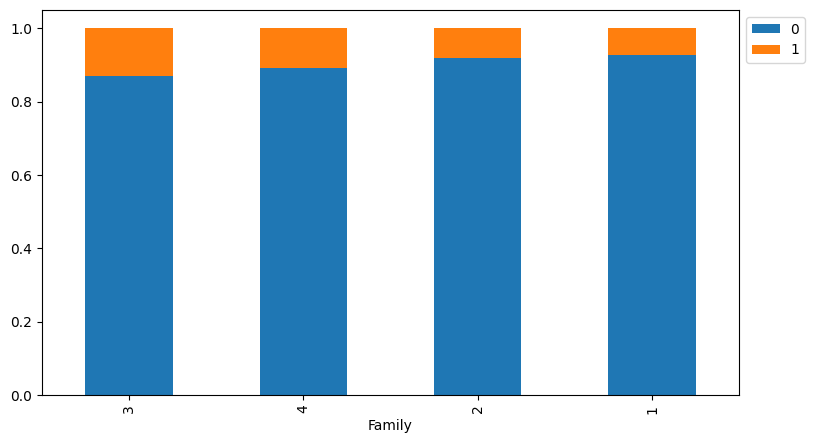

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Family
stacked_barplot(data,"Family","Personal_Loan")

**Observation:**
It is observed that famillies of size 3 or 4 have more proportion of accepting a personal loan. Hence as the familly size grows, customers are more willing to accept personal loans


**Personal_Loan vs Securities_Account**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


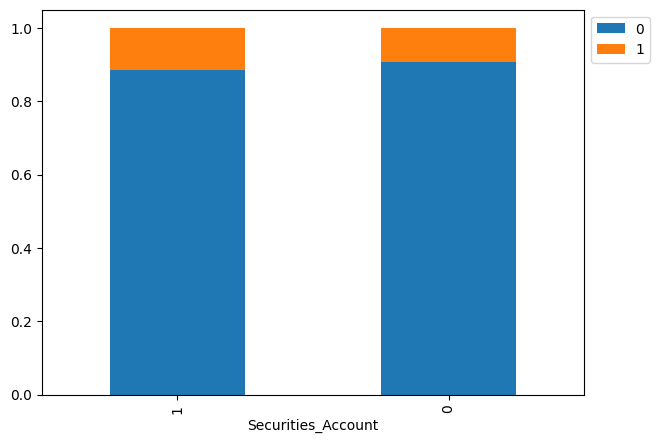

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Securities_Account
stacked_barplot(data,"Securities_Account","Personal_Loan")

**Observation:**
It is observed that customers with Security account are more willing to accept a personal loan

**Personal_Loan vs CD_Account**

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


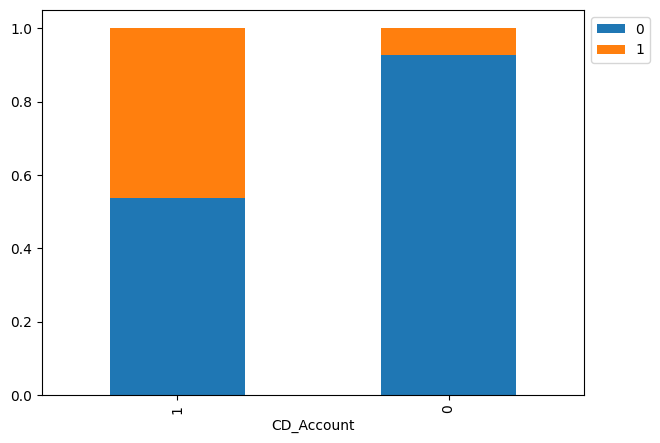

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and CD_Account
stacked_barplot(data,"CD_Account","Personal_Loan")

**Observation:**
It is observed that customers with CD_account are more willing to accept a personal loan

**Personal_Loan vs Online**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


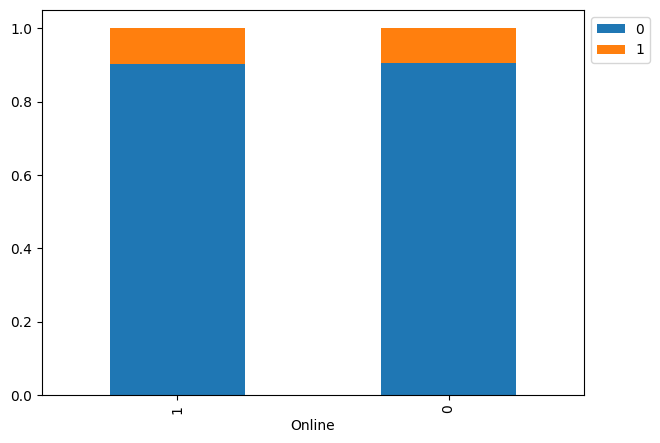

In [ ]:
## Complete the code to plot stacked barplot for P ersonal Loan and Online
stacked_barplot(data,"Online","Personal_Loan")

**Observation:**

It is observed that customers who use iternet banking services and who do not use internet banking services are almost equally likely to accept personal loans

**Personal_Loan vs CreditCard**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


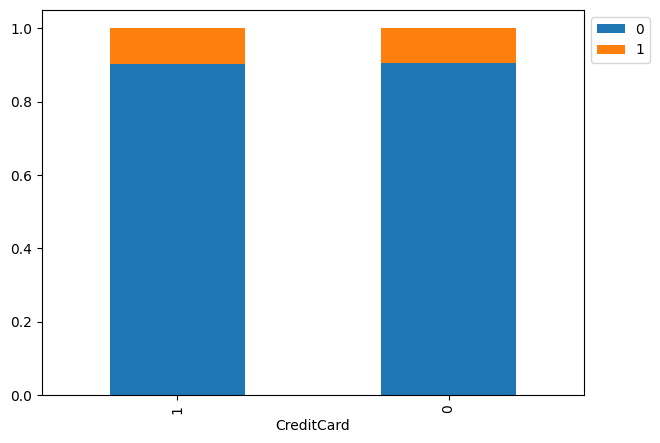

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and CreditCard
stacked_barplot(data,"CreditCard","Personal_Loan")

**Observation:**
It is observed that customers who use credit cards issued by other banks and those who do not are almost equally likely to accept personal loans

Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


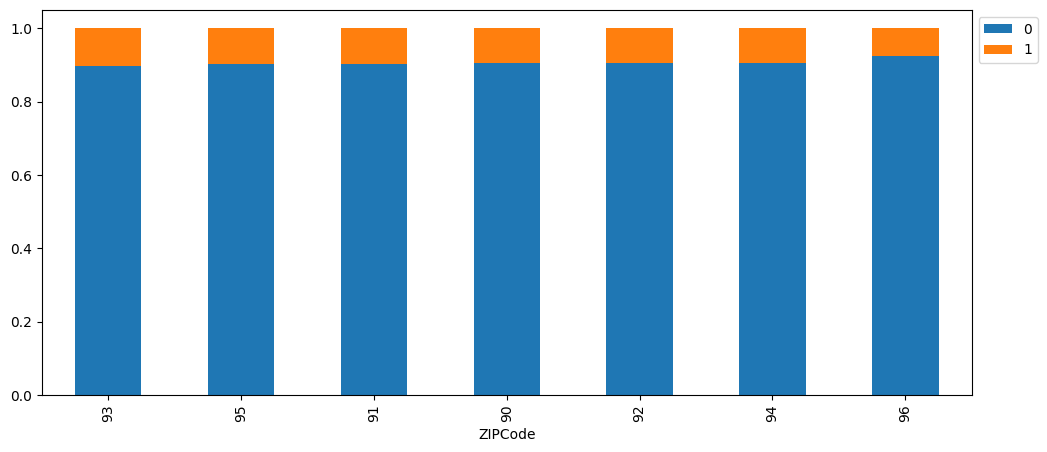

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and ZIPCode
stacked_barplot(data,"ZIPCode","Personal_Loan")

**Observation:**
It is observed that customers are belongs different Locations(Zip code)are almost equally likely to accept personal loans or Not to accept Personal Loans


**How does a customer's interest in purchasing a loan vary with their age? **

Let's check how a customer's interest in purchasing a loan varies with their age

**Personal Loan vs Age:**

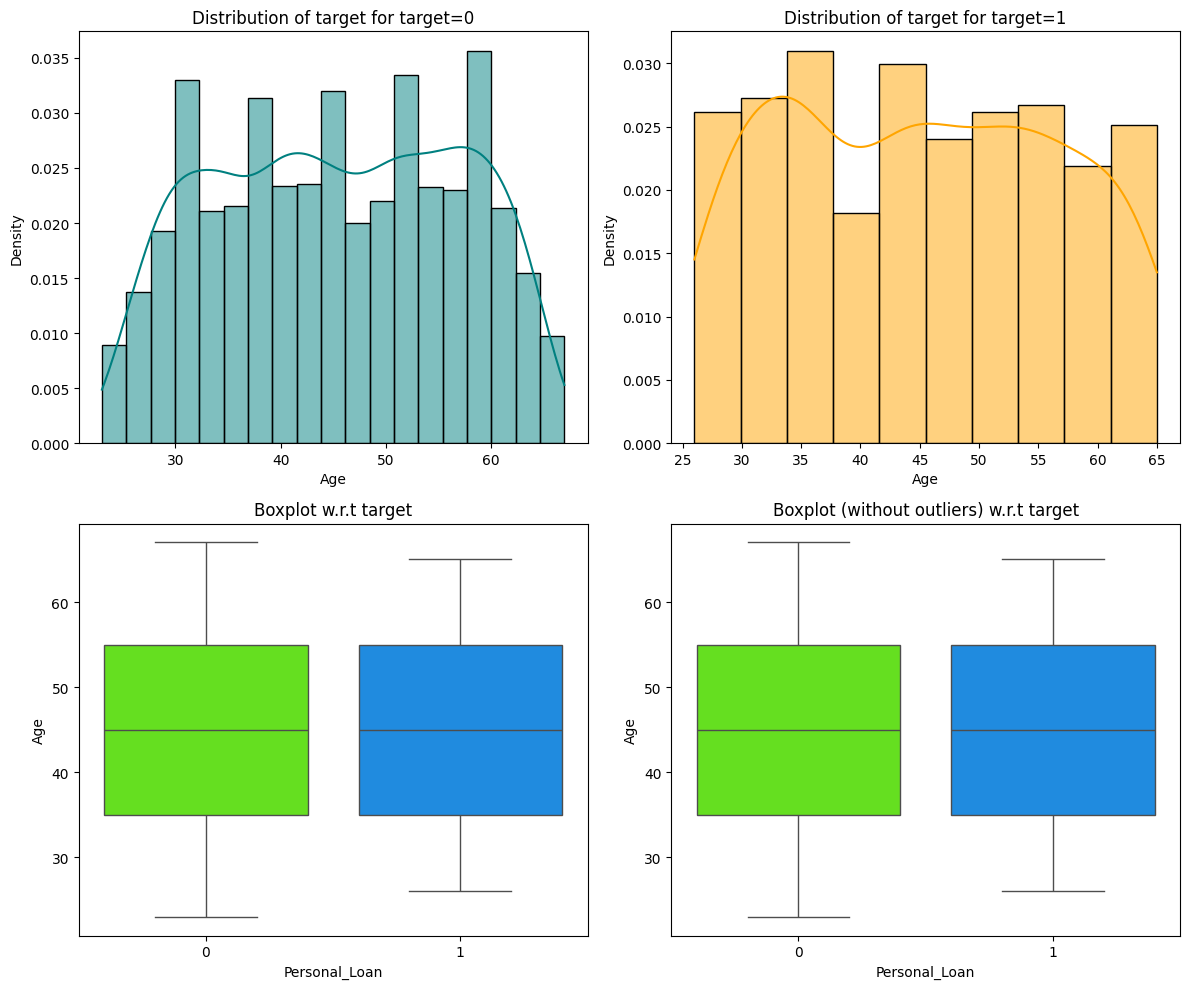

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Age
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

In [ ]:
data[data['Personal_Loan']==0]['Age'].mean()

45.36725663716814

**Observation:**

*   It is observed that the mean age for customers accepting and not accepting personal loans is very close to the value 45 years.
*  From the pair plot Age does not have a relation with our target variable, hence a negligible prediction power



Let's check how a customer's interest in purchasing a loan varies with their Experience.

**Personal Loan vs Experience** :

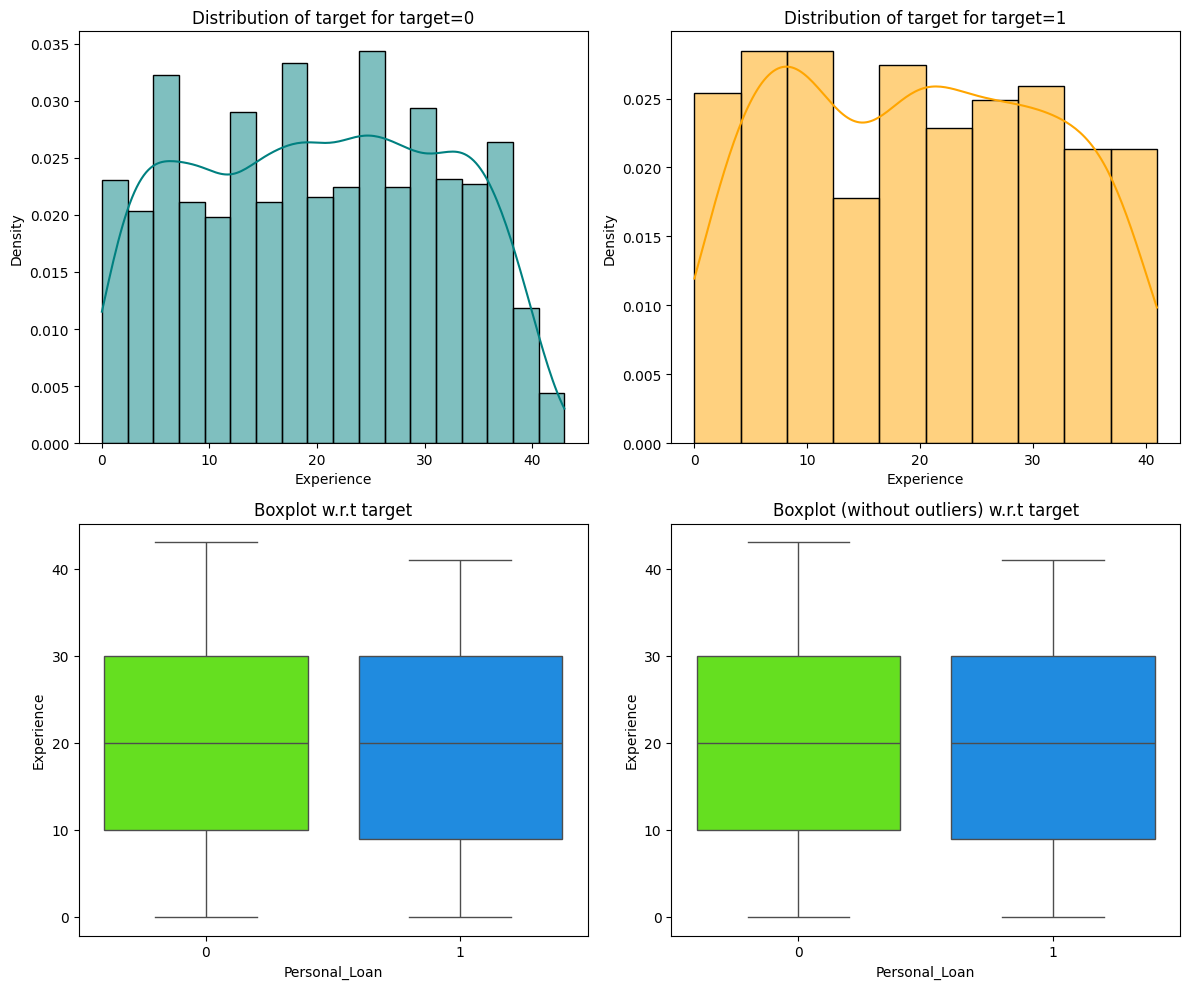

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

In [ ]:
data[data['Personal_Loan']==0]['Experience'].mean()

20.165486725663715

In [ ]:
data[data['Personal_Loan']==1]['Experience'].mean()

19.84375

**observation:**

*   It is observed that the mean Experience for customers accepting and not accepting personal loans is very close to the value 20 years.

*   From the pair plot, Experience does not have a relation hence a prediction power on our target variable.



Let's check how a customer's interest in purchasing a loan varies with their Income.

**Personal Loan vs Income:**

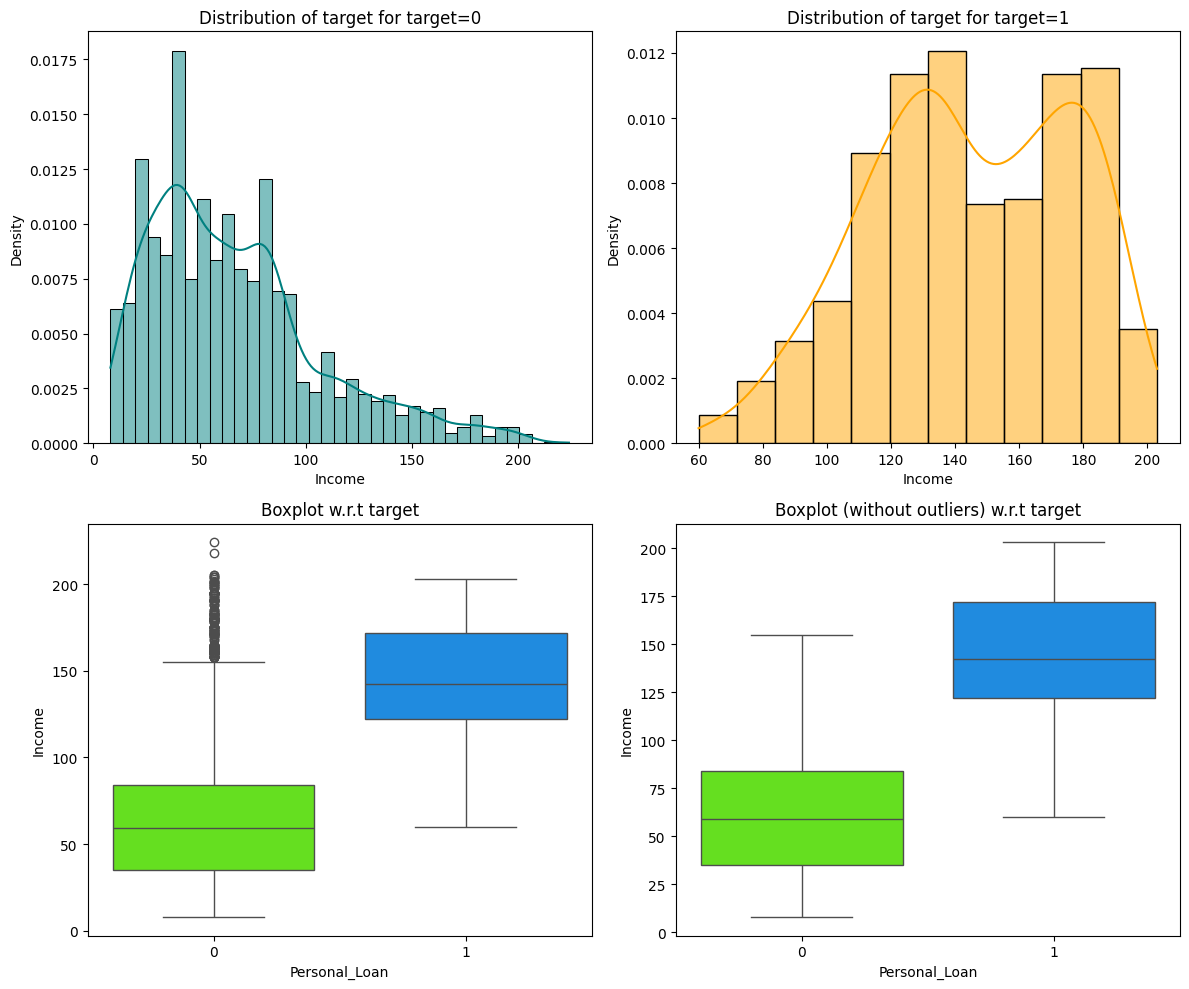

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Income
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

In [ ]:
data[data['Personal_Loan']==0]['Income'].mean()

66.23738938053097

In [ ]:
data[data['Personal_Loan']==1]['Income'].mean()

144.74583333333334

**Observation:**

*   The Income variable varies greatly between customers who accepted and not accepted the personal loan.

*  The mean income for the customers who did not accept the loan is approx USD 66.23K
*   The mean income for the customers who did accept the loan is approx USD 145K
*   This shows that the income level of the customer has a high impact on the customer decision to accept a personal loan, The higher the income, the more chances the customer will accept a personal loan







Let's check how a customer's interest in purchasing a loan varies with their CCAvg.

**Personal Loan vs CCAvg**

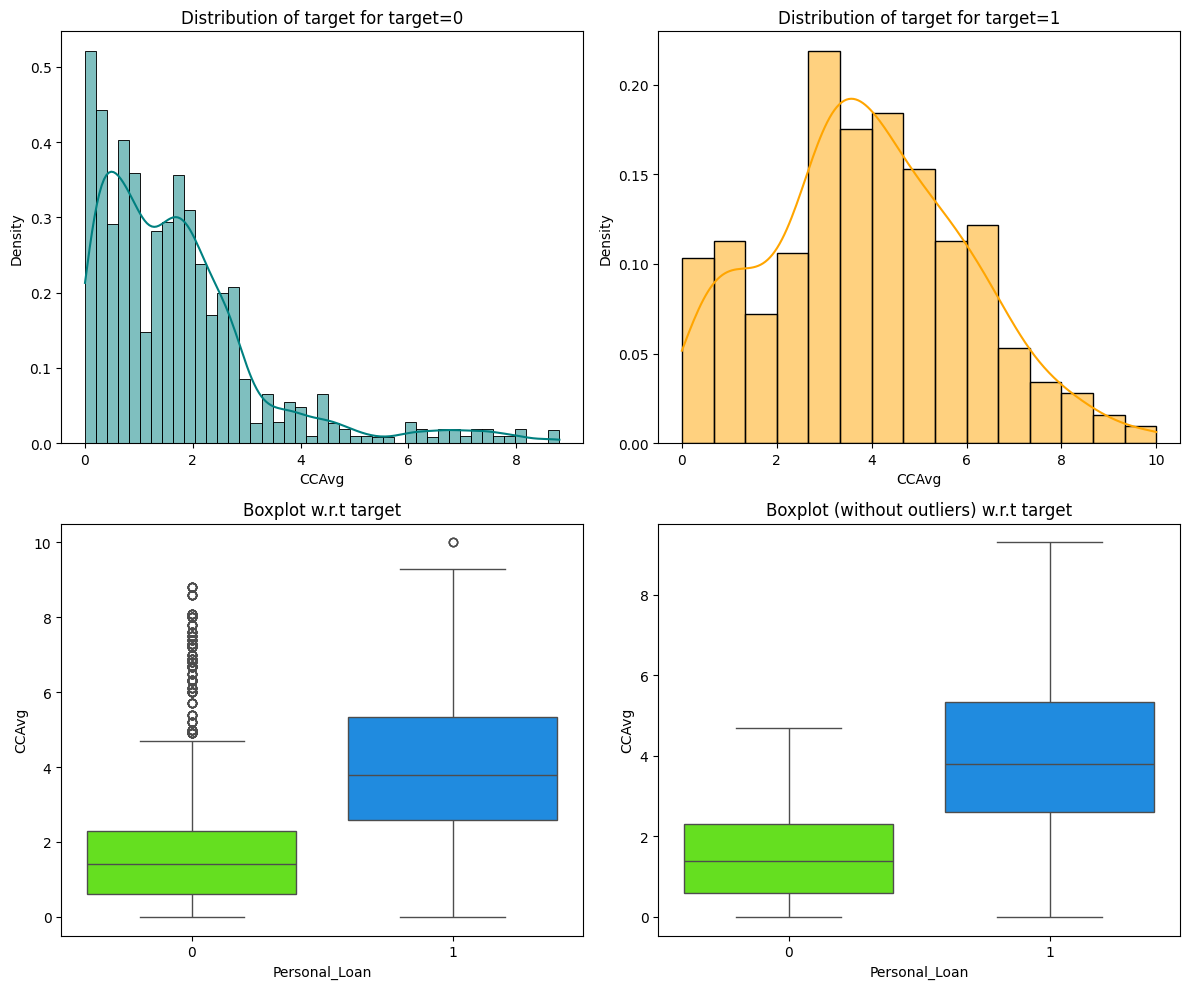

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and CCAvg
distribution_plot_wrt_target(data, "CCAvg","Personal_Loan")

In [ ]:
data[data['Personal_Loan']==0]['CCAvg'].mean()

1.7290088495575222

In [ ]:
data[data['Personal_Loan']==1]['CCAvg'].mean()

3.905354166666667

**Observations:**

It is observed that the mean value of CCAvg of customers not accepting a personal loan is approx USD 1.73 K USD much less than the mean value of customers accepting personal loan of approx USD 3.90K. hence customers who accept personal loan spends more money on monthly basis





What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

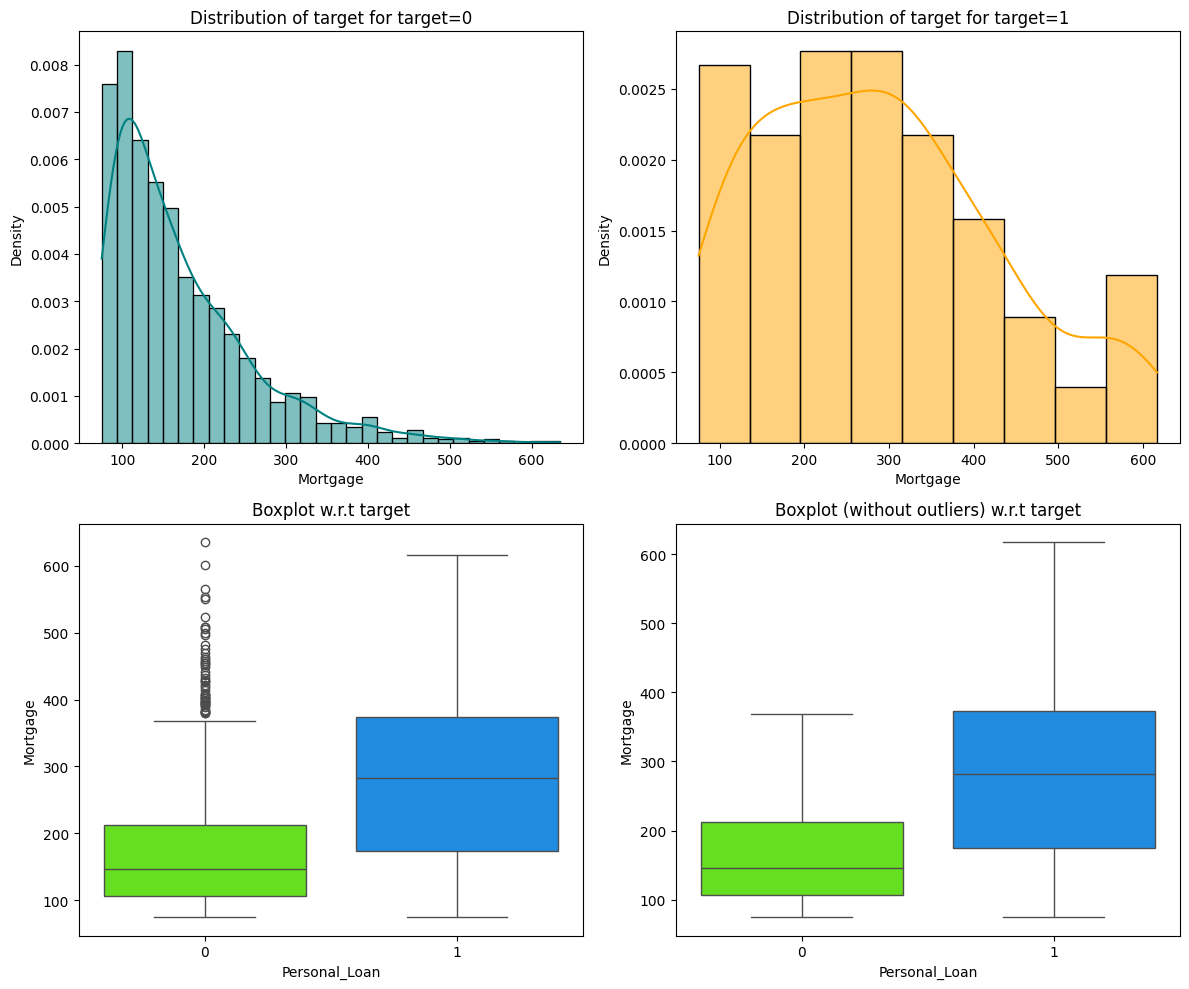

In [ ]:
## Complete the code to plot stacked barplot for Personal Loan and Mortgage
distribution_plot_wrt_target(mortgage,'Mortgage','Personal_Loan')

In [ ]:
data[data['Personal_Loan']==0]['Mortgage'].mean()

51.78938053097345

In [ ]:
data[data['Personal_Loan']==1]['Mortgage'].mean()

100.84583333333333


**Observation:**

It is observed that the customers paying mortage are more likely to accept personal loan, yet As the variable distribution is heavily right skewed due to the high number of customers not paying mortgage, we will plot the distribution of the customers paying mortgage only which are consolidated in the dataframe mortgage. This will give us a better insight on the mortgage mean value for customers accepting vs custmers not accepting a personal loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Outlier Detection**

In [ ]:
# To find the 25th percentile and 75th percentile.
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

**Observation:**

More Outliers are detected for Variable Mortgage and CCAvg


**Data Preparation for Modeling**

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

mention the model evaluation criterion here with proper reasoning
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

### Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

**Decision Tree (sklearn default)**

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Checking model performance on training data

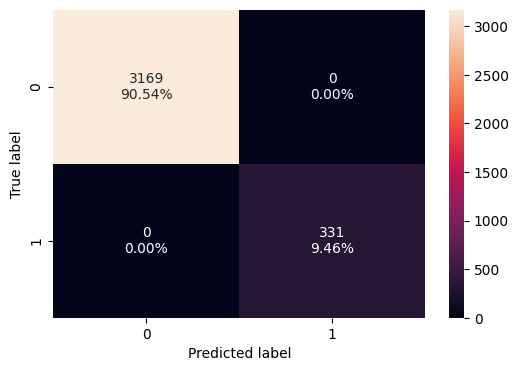

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

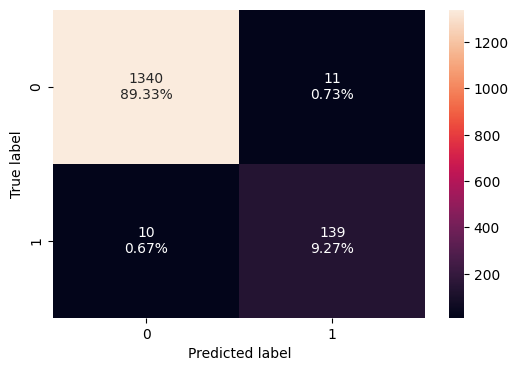

In [ ]:
#Checking model performance on test data
## Complete the code to create confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
## Complete the code to check performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.986  0.932886   0.926667  0.929766

**Observation:**


*   As assumed, based on confuse Matrix of Train data the model is perfectly overfitting the data as observed from the confusion matric the FN & FP are 0%
*  There is a huge difference between the training and test Recall Scores.
This indicates that the model is overfitting.

*   Recall Score of Training data: 1
*  Recall Score of Test data: 0.93





**Visualizing the Decision Tree**

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


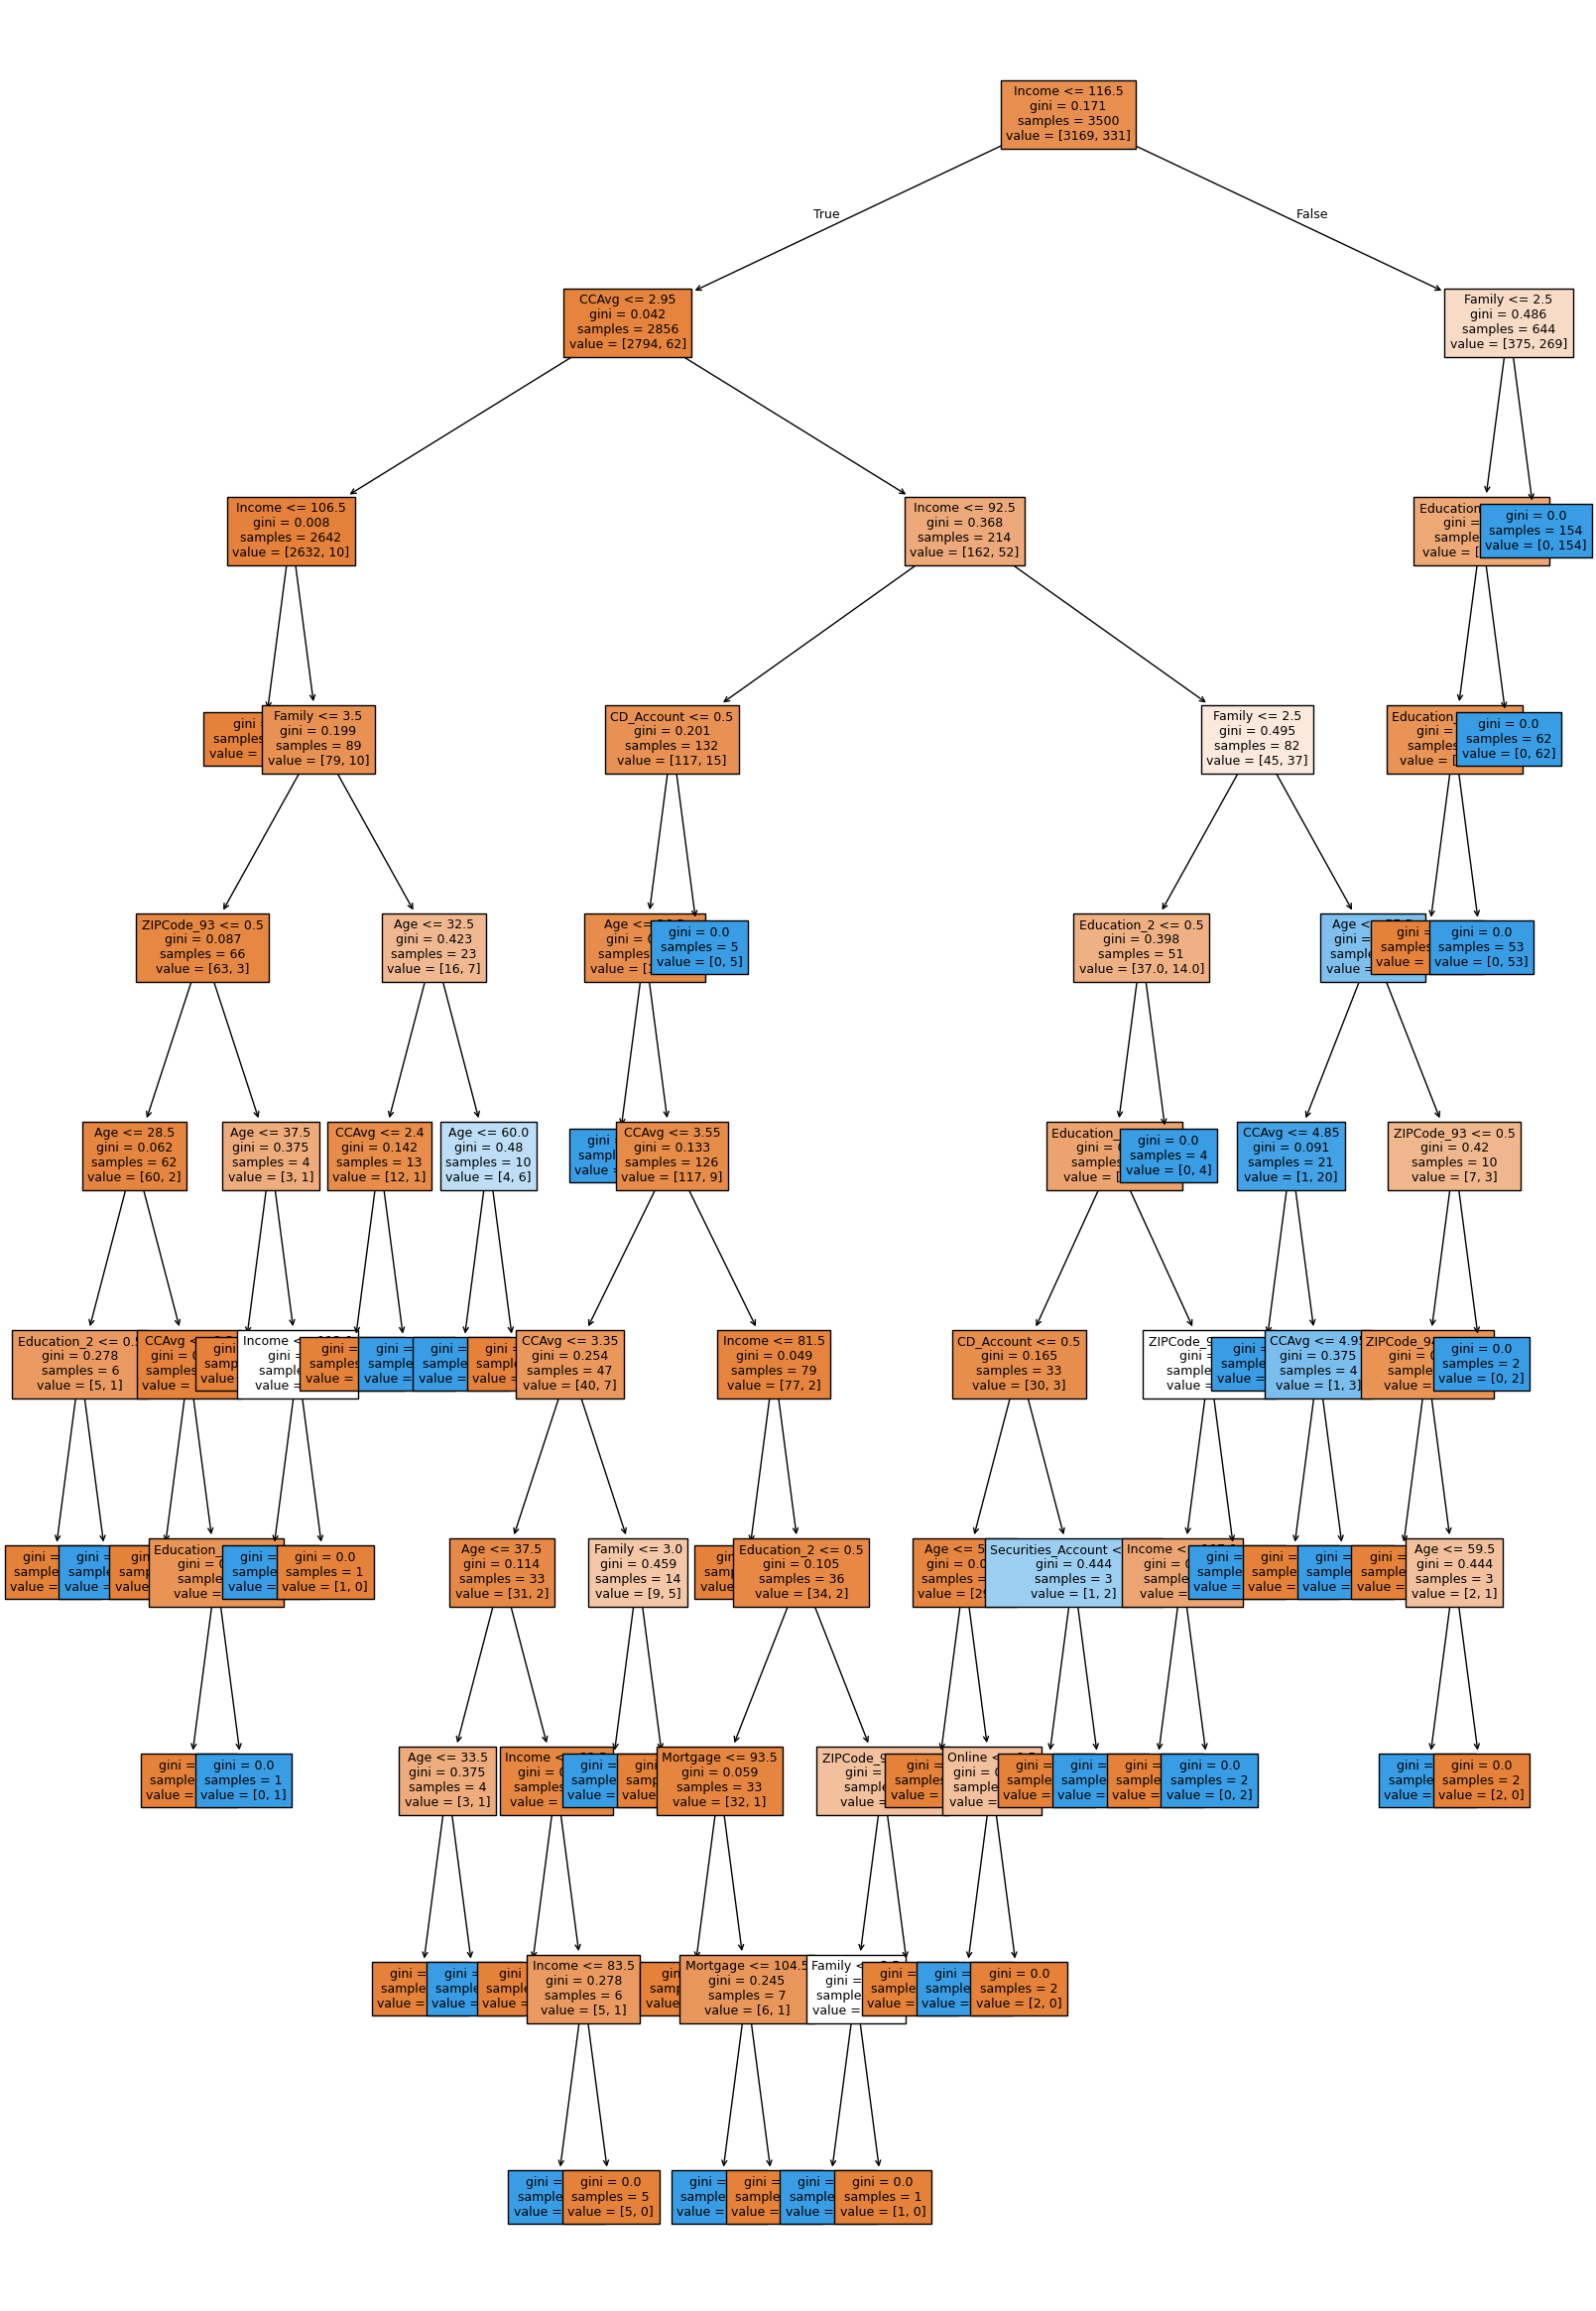

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations:**
We can observe that this is a very complex tree.

*   The original tree  is quiet complicated and is overfitting the training data set, hence pre-prunning and post proning are to be considered to improve the model performance.
*   One very interesting observation still on  is that the first split was on the "Income" variable, hence let us observe first how the variable importances look like




In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


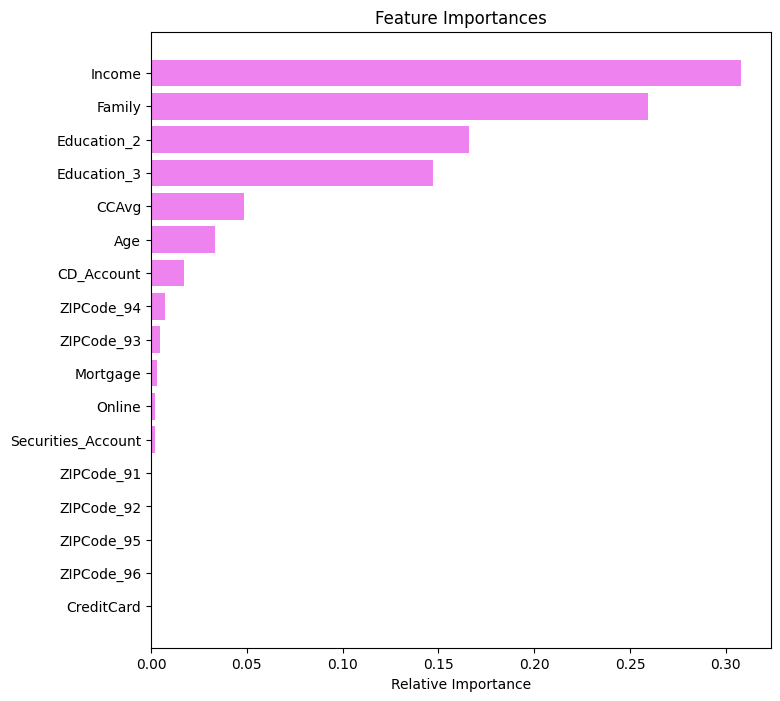

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

*   It is observed that the top importance variable is Income and the least importance are the Zip codes and credit card
**The top 6 variables are :**
1.   Income
2.   Family
3.   Education_2
4.   Education_3
5.   CCAvg
6.   Age











## Model Performance Improvement

**Decision Tree (Pre-pruning)**

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )
          # Fit the model to the training data.
            estimator.fit(X_train, y_train)
            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator
  # Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 50
Best test recall score: 0.8657718120805369


In [ ]:
# creating an instance of the best model
estimator = best_estimator

# fitting the best model to the training data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=50,
                       random_state=1)

**Checking performance on training data**

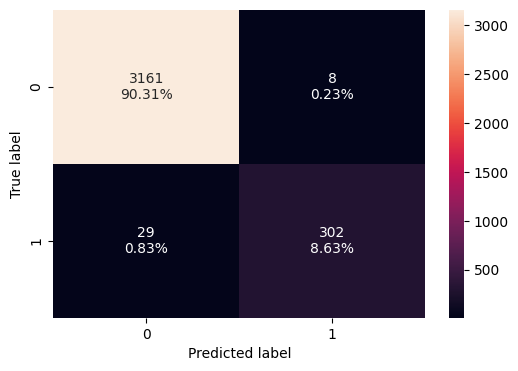

In [ ]:
## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(estimator,X_train, y_train)

In [ ]:
## Complete the code to check performance on train data
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train, y_train)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.989429  0.912387   0.974194  0.942278

**Checking performance on test data**

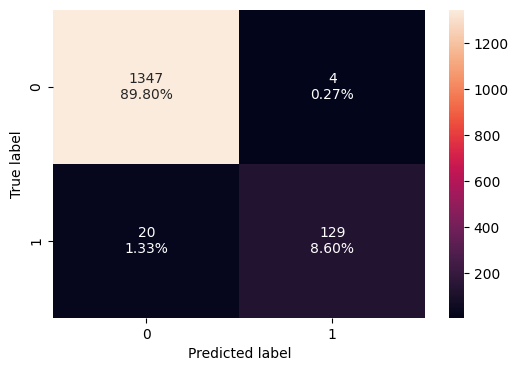

In [ ]:
## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(estimator,X_test, y_test)

In [ ]:
## Complete the code to check performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.865772   0.969925  0.914894

**Visualizing the Decision Tree**

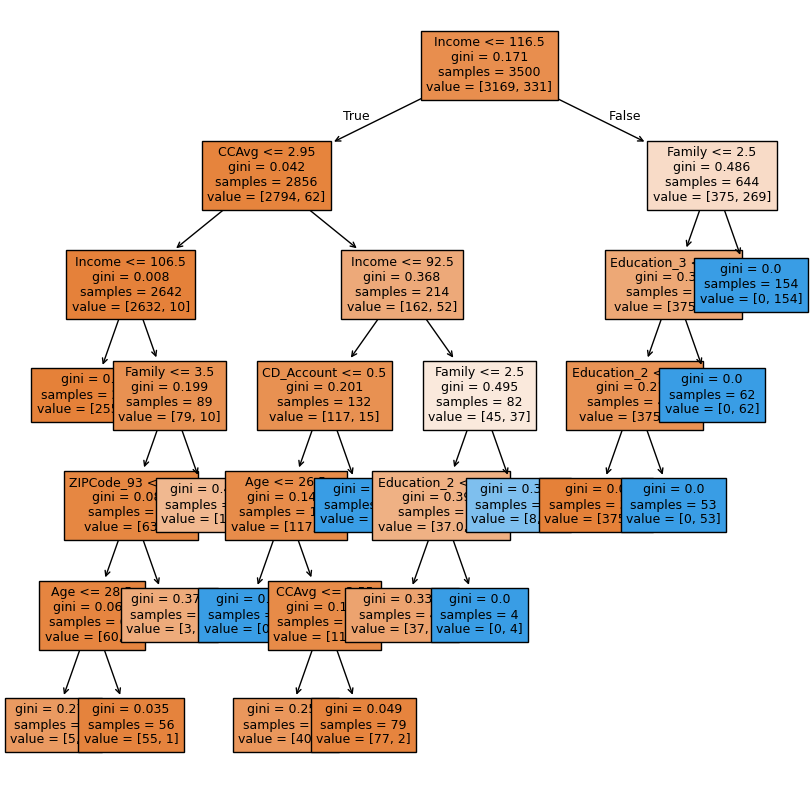

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [5.00, 1.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [55.00, 1.00] class: 0
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- weights: [3.00, 1.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- weights: [40.00, 7.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [77.0

**  Observations:-**

*   Max depth: 6,The model Performance is best  on the test set is better than Train model at Pre-pruning
*   Best test recall score: 0.8657718120805369
* Test data recall score is 0.865772
*   Train data recall score is 0.912387


From Confuse Matrix

*   FN at 1.33% for Test data
*   FP at 0.27% for Test data
*   FN at 0.83% for Train data
*   FP at 0.23% for Train data













In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.329904
Family              0.273460
Education_2         0.180085
Education_3         0.153664
CCAvg               0.043533
CD_Account          0.015091
Age                 0.003606
ZIPCode_93          0.000658
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


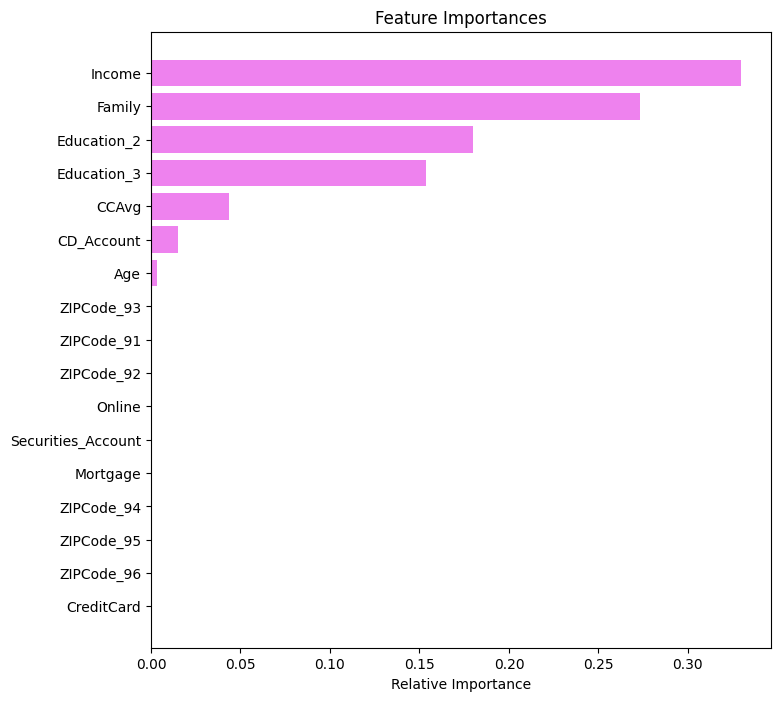

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

*   Features with max importance:
    *   Income-0.333644
    *   Family-0.276560
*  Less importance yet still having a predictibily effect:

    *   Education_2         0.173587
    *   Education_3         0.155406
    *   CCAvg               0.042343
    *   CD_Account          0.015262
    *   Age                 0.003198




**Decision Tree (Post-pruning)**

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=1)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000186    0.001114
2     0.000214    0.001542
3     0.000242    0.002750
4     0.000250    0.003250
5     0.000268    0.004324
6     0.000272    0.004868
7     0.000276    0.005420
8     0.000381    0.005801
9     0.000527    0.006329
10    0.000625    0.006954
11    0.000700    0.007654
12    0.000769    0.010731
13    0.000882    0.014260
14    0.000889    0.015149
15    0.001026    0.017200
16    0.001305    0.018505
17    0.001647    0.020153
18    0.002333    0.022486
19    0.002407    0.024893
20    0.003294    0.028187
21    0.006473    0.034659
22    0.025146    0.084951
23    0.039216    0.124167
24    0.047088    0.171255

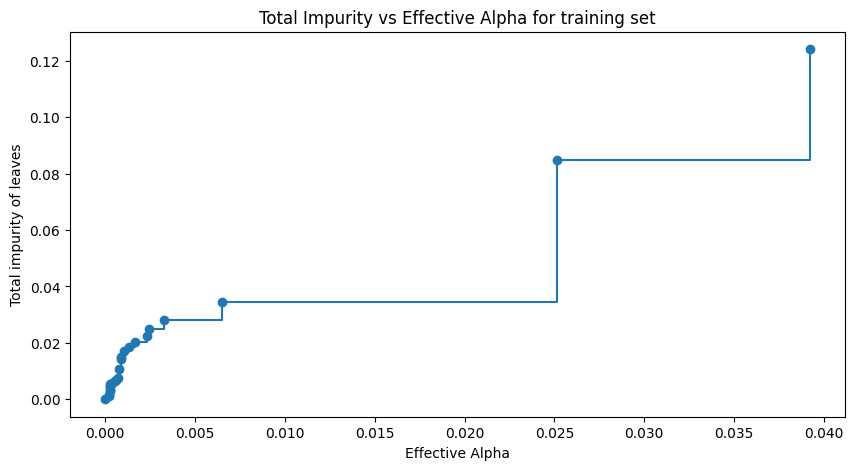

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

**Observation:**

*   It is observed that the impurities show a sudden peak after alpha = approx.0.004





In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04708834100596766


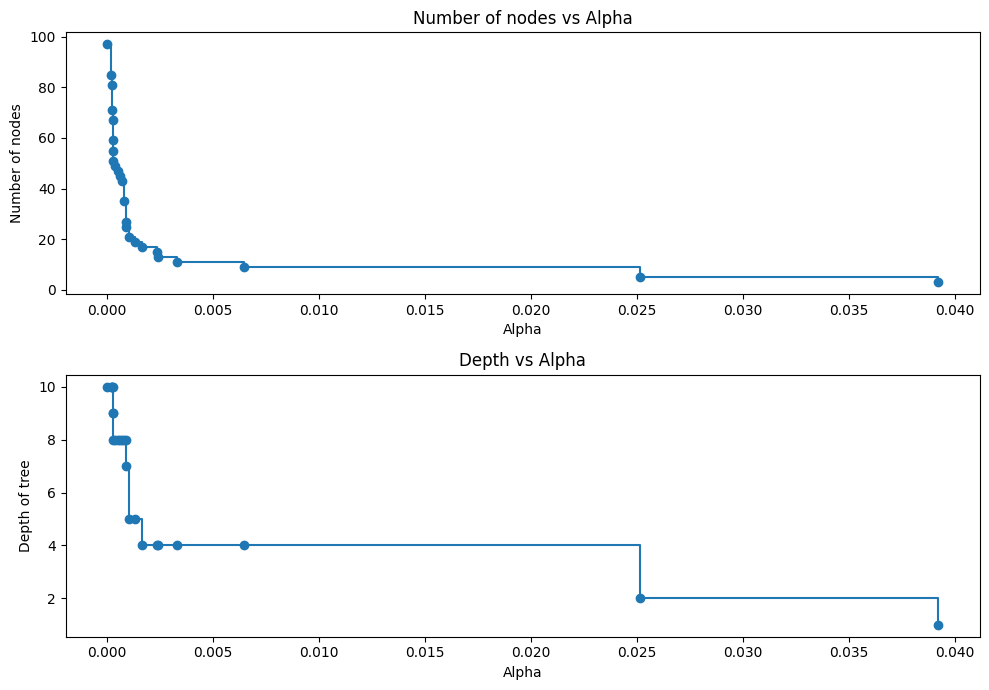

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

**Observations:**

*   It is observed that alpha = 0.0025 Approx, the tree seems to have reached the smallest size which is underfitting the data. Hence, we now have an idea that the alpha value that will give us the optimum model performance is definitely below 0.04





**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

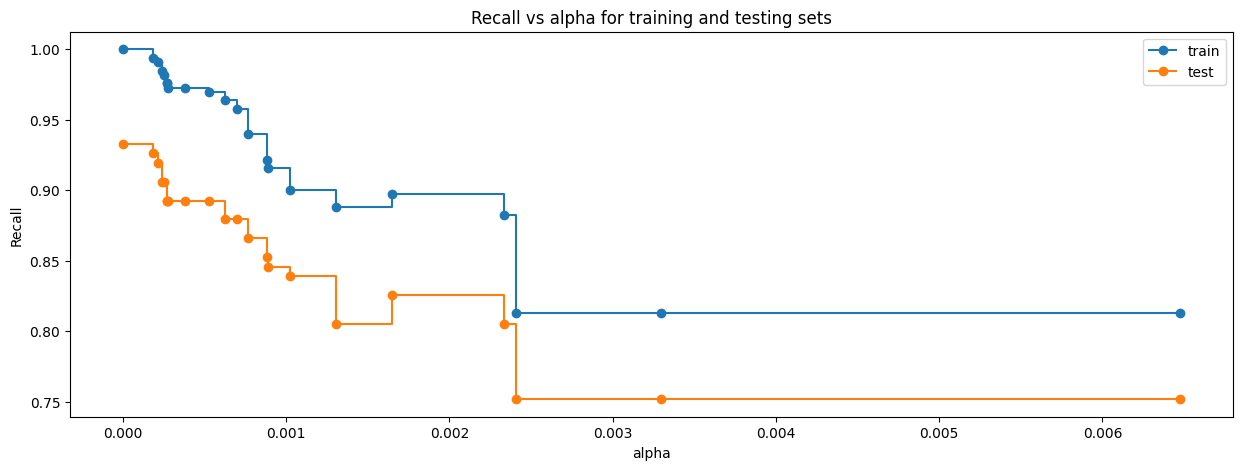

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


**Observation:**

*   I observe a better performance at alpha less than 0.0025. Visually the value of alpha giving the best recall value is either very close to zero which could be still reflecting an over fitting tree




In [ ]:
# creating the model where we get highest recall Score
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha= index_best_model, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

**Checking performance on training data**

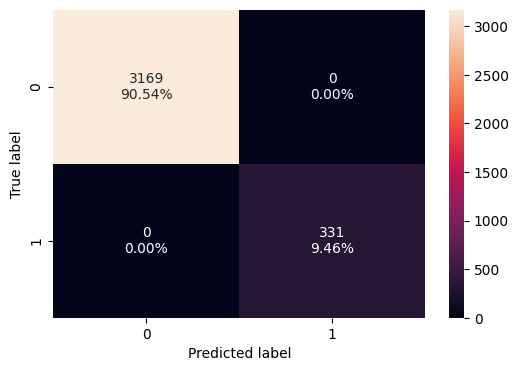

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

**Checking performance on test data**

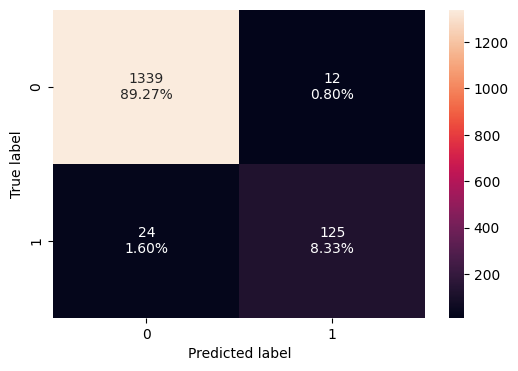

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

Accuracy    Recall  Precision        F1
0     0.976  0.838926   0.912409  0.874126

**Observation:**
The Recall on train data sets is 1.0 which raises the suspicion of an overfitting model, yet its value is closer to the recall of the test dataset which is still better than Pre-pruning recal value. Hence, we will derive the tree, decision table and feature importantce for this model.

*   Recall Value on Train Data: 1
*   Recall Value on Test data:0.838926

Post Pruning Test data Recall value is slight better that Pre-pruning recall value of Test data




**Visualizing the Decision Tree**

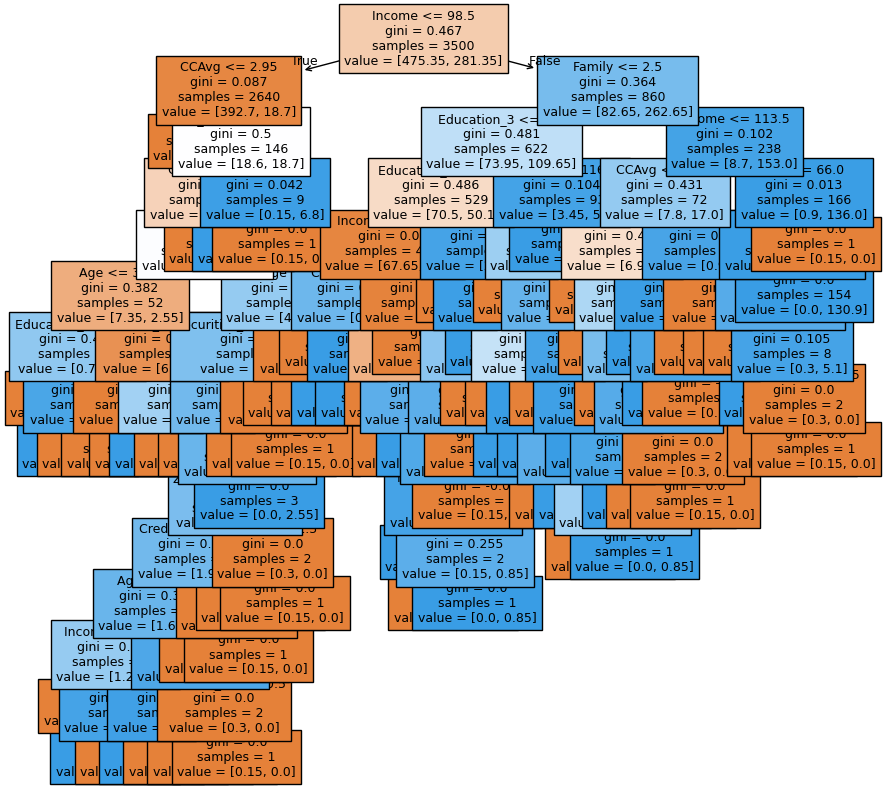

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [2.55, 0.00] class: 0
|   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |--- weights: [3.60, 0.00] class: 0
|   |   |   |   |   |   |--- 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              5.979097e-01
Education_2         1.388508e-01
CCAvg               8.152996e-02
Education_3         6.895824e-02
Family              6.407969e-02
Age                 1.825151e-02
CD_Account          1.099955e-02
Mortgage            5.762198e-03
ZIPCode_91          5.088280e-03
ZIPCode_94          3.980114e-03
Securities_Account  1.946974e-03
CreditCard          1.061543e-03
ZIPCode_92          8.015507e-04
Online              7.798872e-04
ZIPCode_95          3.768988e-18
ZIPCode_93          0.000000e+00
ZIPCode_96          0.000000e+00


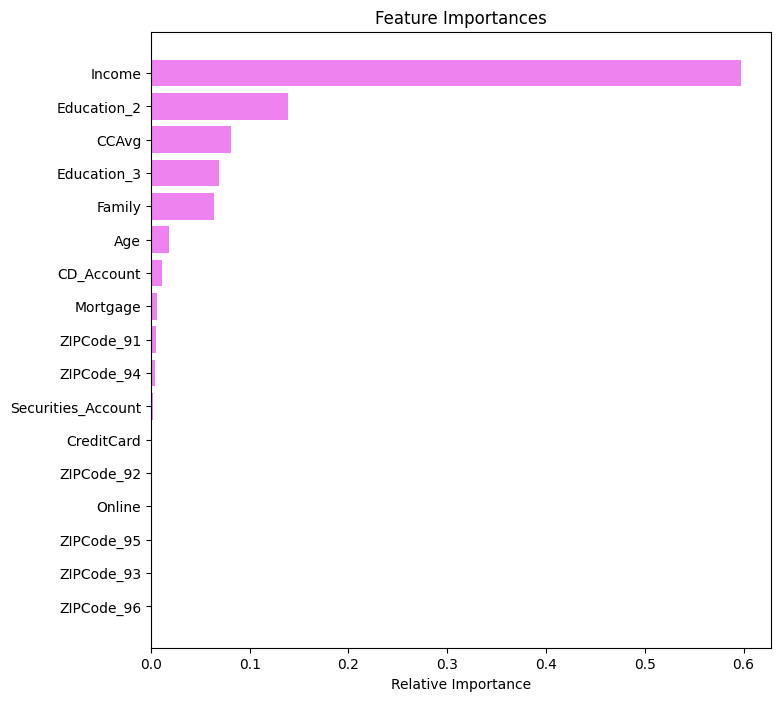

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**

*   Based on Decesion tree and feature ,Here requires further improvement in the data model

Post Pruning performance Summary:
Recall Values.
*   Recall Value on Train Data: 1
*   Recall Value on Test data:0.838926


Features with max importance:

*  Income              5.979097e
*   Education_2         1.388508e

Next Level Importance/Less importance yet still having a predictibily effect:
*   CCAvg               8.152996e
*   Education_3         6.895824e
*   Family              6.407969e
*   Age                 1.825151e
*   CD_Account          1.099955e

3rd Level Importance

*   Mortgage            5.762198e
*   ZIPCode_91          5.088280e
*  ZIPCode_94          3.980114e
*   Securities_Account  1.946974e
*   CreditCard          1.061543e

Least Importance

*   ZIPCode_92          8.015507e
*   Online              7.798872e

Confusion matrix:

On Train Data:

*   FN at 0.00% (Not realistic)
*  FP at 0.00%(Not realistic)

On Test Data:

*   FN at 1.60%
*   FP at 0.80%


## Model Performance Comparison and Final Model Selection

Checking performance on training data

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.989429   
Recall                                 1.0                     0.912387   
Precision                              1.0                     0.974194   
F1                                     1.0                     0.942278   

           Decision Tree (Post-Pruning)  
Accuracy                            1.0  
Recall                              1.0  
Precision                           1.0  
F1                                  1.0

**Test set performance comparison:**

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.986000                     0.984000   
Recall                            0.932886                     0.865772   
Precision                         0.926667                     0.969925   
F1                                0.929766                     0.914894   

           Decision Tree (Post-Pruning)  
Accuracy                       0.976000  
Recall                         0.838926  
Precision                      0.912409  
F1                             0.874126

**Observation:**

*   Both the pre-pruned and post-pruned decision trees exhibit generalized performances.
*  The post-pruned decision tree has an approx. 3.2% better performance on the test set than the training set.

1.  This model uses only two features for decision-making.


*    The pre-pruned decision tree has slight different performance on training and test sets.

      1.   This model uses a few more features for decision-making than the post-pruned decision tree.

      2.   This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.

*   We'll move ahead with the pre-pruned decision tree as our final model.




In [ ]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = estimator.predict(applicant_details)
print(approval_prediction)

[0]
CPU times: user 3.9 ms, sys: 0 ns, total: 3.9 ms
Wall time: 4.11 ms


In [ ]:
%%time
# choosing a data point
applicant_details = X_train.iloc[:1, :]

# making a prediction
approval_prediction = estimator_2.predict(applicant_details)

print(approval_prediction)

[0]
CPU times: user 4.67 ms, sys: 0 ns, total: 4.67 ms
Wall time: 5.36 ms


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Actionable Insights:**

The best performing model was derived from the Decision Tree Modelling technique where the original tree was post pruned with test data model.

Gave the below Recall values for test and training data sets:

Recall for Post Pruning on Train Data = 1
Recall for Post pruning on Test Data = 0.838926

**Business Recommendations:**

*   The marketing team is recommended to study the customers profiles first before approaching them for a personal loan offer.
*   The top 5 features stated in the features list below need to be considered as the target customer profile for a personal loan campaign.


1.   Income-	The higher the income, the more chances the customer will accept a personal loan
2.   Education_2	-Customers with Education level 2 are more willing to accept a personal loan than levels 1 & 3
3.   CCAvg	As the monthly spending of customers increase, the more they are willing to accept personal loan
4.   Education_3	Customers with Education level are more willing to accept a personal loan than level 1
5.  Family	As familly size grows, customers are more willing to accept personal loan




___